# 221118

## 딥러닝

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#명령 프롬프트 창 --> pip install tensorflow

In [ ]:
#생략가능한 코드
import tensorflow as tf
from tensorflow import keras

In [20]:
#케라스 패키지
import keras

In [21]:
from keras import Sequential
from keras import optimizers   #optimizer : 손실함수를 통해 얻은 손실값으로부터 모델을 업데이트(수정)하는 방식
from keras.layers import Input, Dense

sparse matrix : 희소행렬<br>
dense  matrix : 밀집행렬

In [ ]:
#-1 ~ 1 까지 100 조각
np.arange(-1, 1, 0.01).shape
np.arange(-1, 1, 0.02).shape

In [5]:
#학습 및 평가에 사용할 전체 데이터 지정
x = np.linspace(-1, 1, 100)    #균등분할
y = x**2

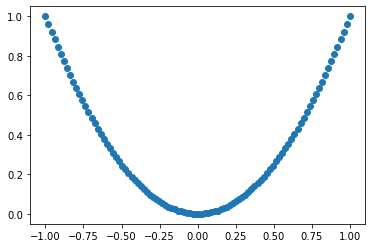

In [6]:
plt.scatter(x, y)

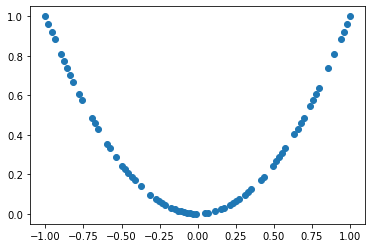

In [7]:
np.random.shuffle(x)

plt.scatter(x[:70], (x[:70])**2)

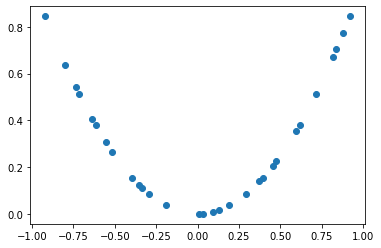

In [8]:
plt.scatter(x[70:], (x[70:])**2)

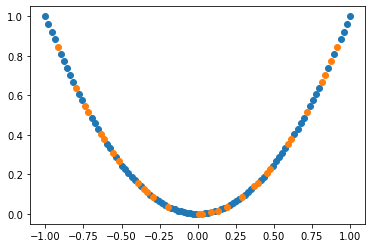

In [24]:
plt.scatter(x[:70], (x[:70])**2)
plt.scatter(x[70:], (x[70:])**2)

In [10]:
#인공신경망 모델링
seq = Sequential()

#add : 레이어(층)를 덧붙인다
seq.add(Input(1))   #input 레이어
seq.add(Dense(units=10, activation='sigmoid'))   #dense(밀집) 레이어1 / units : 뉴런의 수
seq.add(Dense(units=10, activation='sigmoid'))   #dense(밀집) 레이어2
seq.add(Dense(units=1))   #output 레이어

#compile : 모델 매개변수를 통해 모델 구조 생성
#SGD : 확률적 경사 하강법, loss : 손실 함수 (예측값과 실제값의 차이)
seq.compile(optimizer = 'SGD', loss = 'mse', metrics = 'mse')

https://g-idler.tistory.com/7<br>
활성화 함수란, 개별 뉴런에 들어오는 입력 신호의 총합을 출력 신호로 변환해주는 함수이다.<br>
활성화 함수로는 대부분 비선형 함수를 사용하며, 대표적으로 시그모이드(Sigmoid) 함수가 있다.<br>

시그모이드 함수는 입력 신호의 총합을 0에서 1 사이의 값으로 변환해주는 함수이다.<br>
입력 신호의 값이 커질수록 1에 수렴하고, 입력 신호의 값이 작아질수록 0에 수렴한다.

epochs : 에포크의 반복 횟수 (총 에포크)<br>
epoch(에포크) : 인공신경망을 학습할 때 학습 데이터 전체가 사용된 한 회 또는 한 세대<br>
verbose : 학습 진행 상황의 표시 여부 (1 : 표시, 0 : 표시 안함)

In [11]:
## 학습
#train_set : x[:70], (x[:70])**2
#test_set : x[70:], (x[70:])**2

seq.fit(x[:70], (x[:70])**2, epochs=100, verbose=1, batch_size=16)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1893 - mse: 0.1893
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1311 - mse: 0.1311
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.1134
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1075 - mse: 0.1075
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1052 - mse: 0.1052
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1036 - mse: 0.1036
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1026 - mse: 0.1026
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1020 - mse: 0.1020
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1026 - mse: 0.1026
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1022 - mse: 0.1022
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1032 

In [12]:
#verbose = 0 일 때로 한번더 학습 --> epochs가 200인 셈
seq.fit(x[:70], (x[:70])**2, epochs=100, verbose=0, batch_size=16)

In [13]:
#출력값 예측
pred = seq.predict(x[70:])
pred

1/1 [==============================] - 0s 93ms/step


array([[0.3446734 ],
       [0.33842492],
       [0.33453035],
       [0.34973383],
       [0.3399865 ],
       [0.3415491 ],
       [0.33647537],
       [0.34662318],
       [0.3260646 ],
       [0.3403771 ],
       [0.34895748],
       [0.32720727],
       [0.33336592],
       [0.32304108],
       [0.32644504],
       [0.31894702],
       [0.3291211 ],
       [0.31784463],
       [0.33297837],
       [0.32530552],
       [0.31931585],
       [0.32117045],
       [0.32229096],
       [0.34856892],
       [0.35050917],
       [0.32079834],
       [0.34193975],
       [0.33530766],
       [0.31565946],
       [0.34428293]], dtype=float32)

In [14]:
#예측값(pred)과 실제값(x[70:]**2) 비교
print('sum:', np.sum(np.abs(pred - x[70:]**2)))
print('avg:', np.sum(np.abs(pred - x[70:]**2))/30)

sum: 207.97659621181788
avg: 6.932553207060596


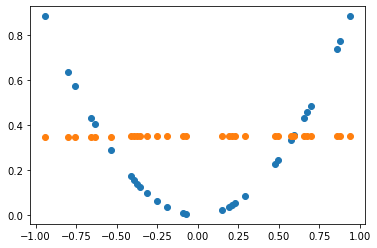

In [15]:
plt.scatter(x[70:], (x[70:])**2)   #실제
plt.scatter(x[70:], pred)          #예측값

활성화 함수(activation) 종류 및 비교<br>
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=handuelly&logNo=221824080339<br>

Tanh 함수 : Sigmoid 함수를 변형한 것,<br>
함수의 중심점을 0으로 옮겨 sigmoid가 갖고 있던 최적화 과정에서 느려지는 문제 해결

In [10]:
#다시 실행
seq = Sequential()

#add : 레이어(층)를 덧붙인다
seq.add(Input(1))   #input 레이어
seq.add(Dense(units=10, activation='tanh'))   #dense(밀집) 레이어1 / units : 뉴런의 수
seq.add(Dense(units=10, activation='tanh'))   #dense(밀집) 레이어2
seq.add(Dense(units=1))   #output 레이어

#compile : 모델 매개변수를 통해 모델 구조 생성
#SGD : 확률적 경사 하강법, loss : 손실 함수 (예측값과 실제값의 차이)
seq.compile(optimizer = 'SGD', loss = 'mse', metrics = 'mse')

In [ ]:
seq.fit(x[:70], (x[:70])**2, epochs=1000, verbose=0, batch_size=16)
pred1 = seq.predict(x[70:])

1/1 [==============================] - 0s 95ms/step


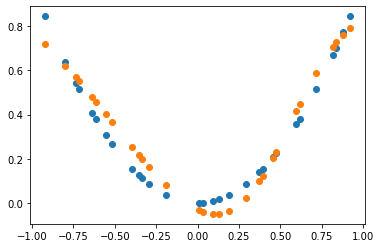

In [30]:
plt.scatter(x[70:], (x[70:])**2)   #실제
plt.scatter(x[70:], pred1)          #예측값

In [31]:
#다시 실행2
x = np.linspace(-1, 1, 1000)
np.random.shuffle(x)

In [32]:
#데이터 학습 모델
seq = Sequential()

seq.add(Input(1))   #input 레이어
seq.add(Dense(units=10, activation='tanh'))   #dense(밀집) 레이어1 / units : 뉴런의 수
seq.add(Dense(units=10, activation='tanh'))   #dense(밀집) 레이어2
seq.add(Dense(units=1))   #output 레이어

seq.compile(optimizer = 'SGD', loss = 'mse', metrics = 'mse')

In [35]:
n = 800
seq.fit(x[:n], (x[:n])**2, epochs=1000, verbose=0, batch_size=32)
pred2 = seq.predict(x[n:])

7/7 [==============================] - 0s 1ms/step


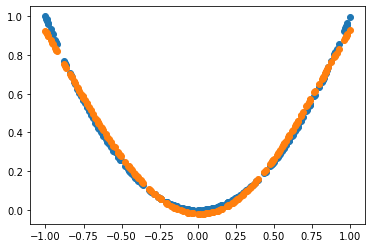

In [36]:
plt.scatter(x[n:], (x[n:])**2)   #실제
plt.scatter(x[n:], pred2)        #예측값

# 책) 케라스 창시자에게 배우는 딥러닝

## 2-1. 신경망의 수학적 구성요소

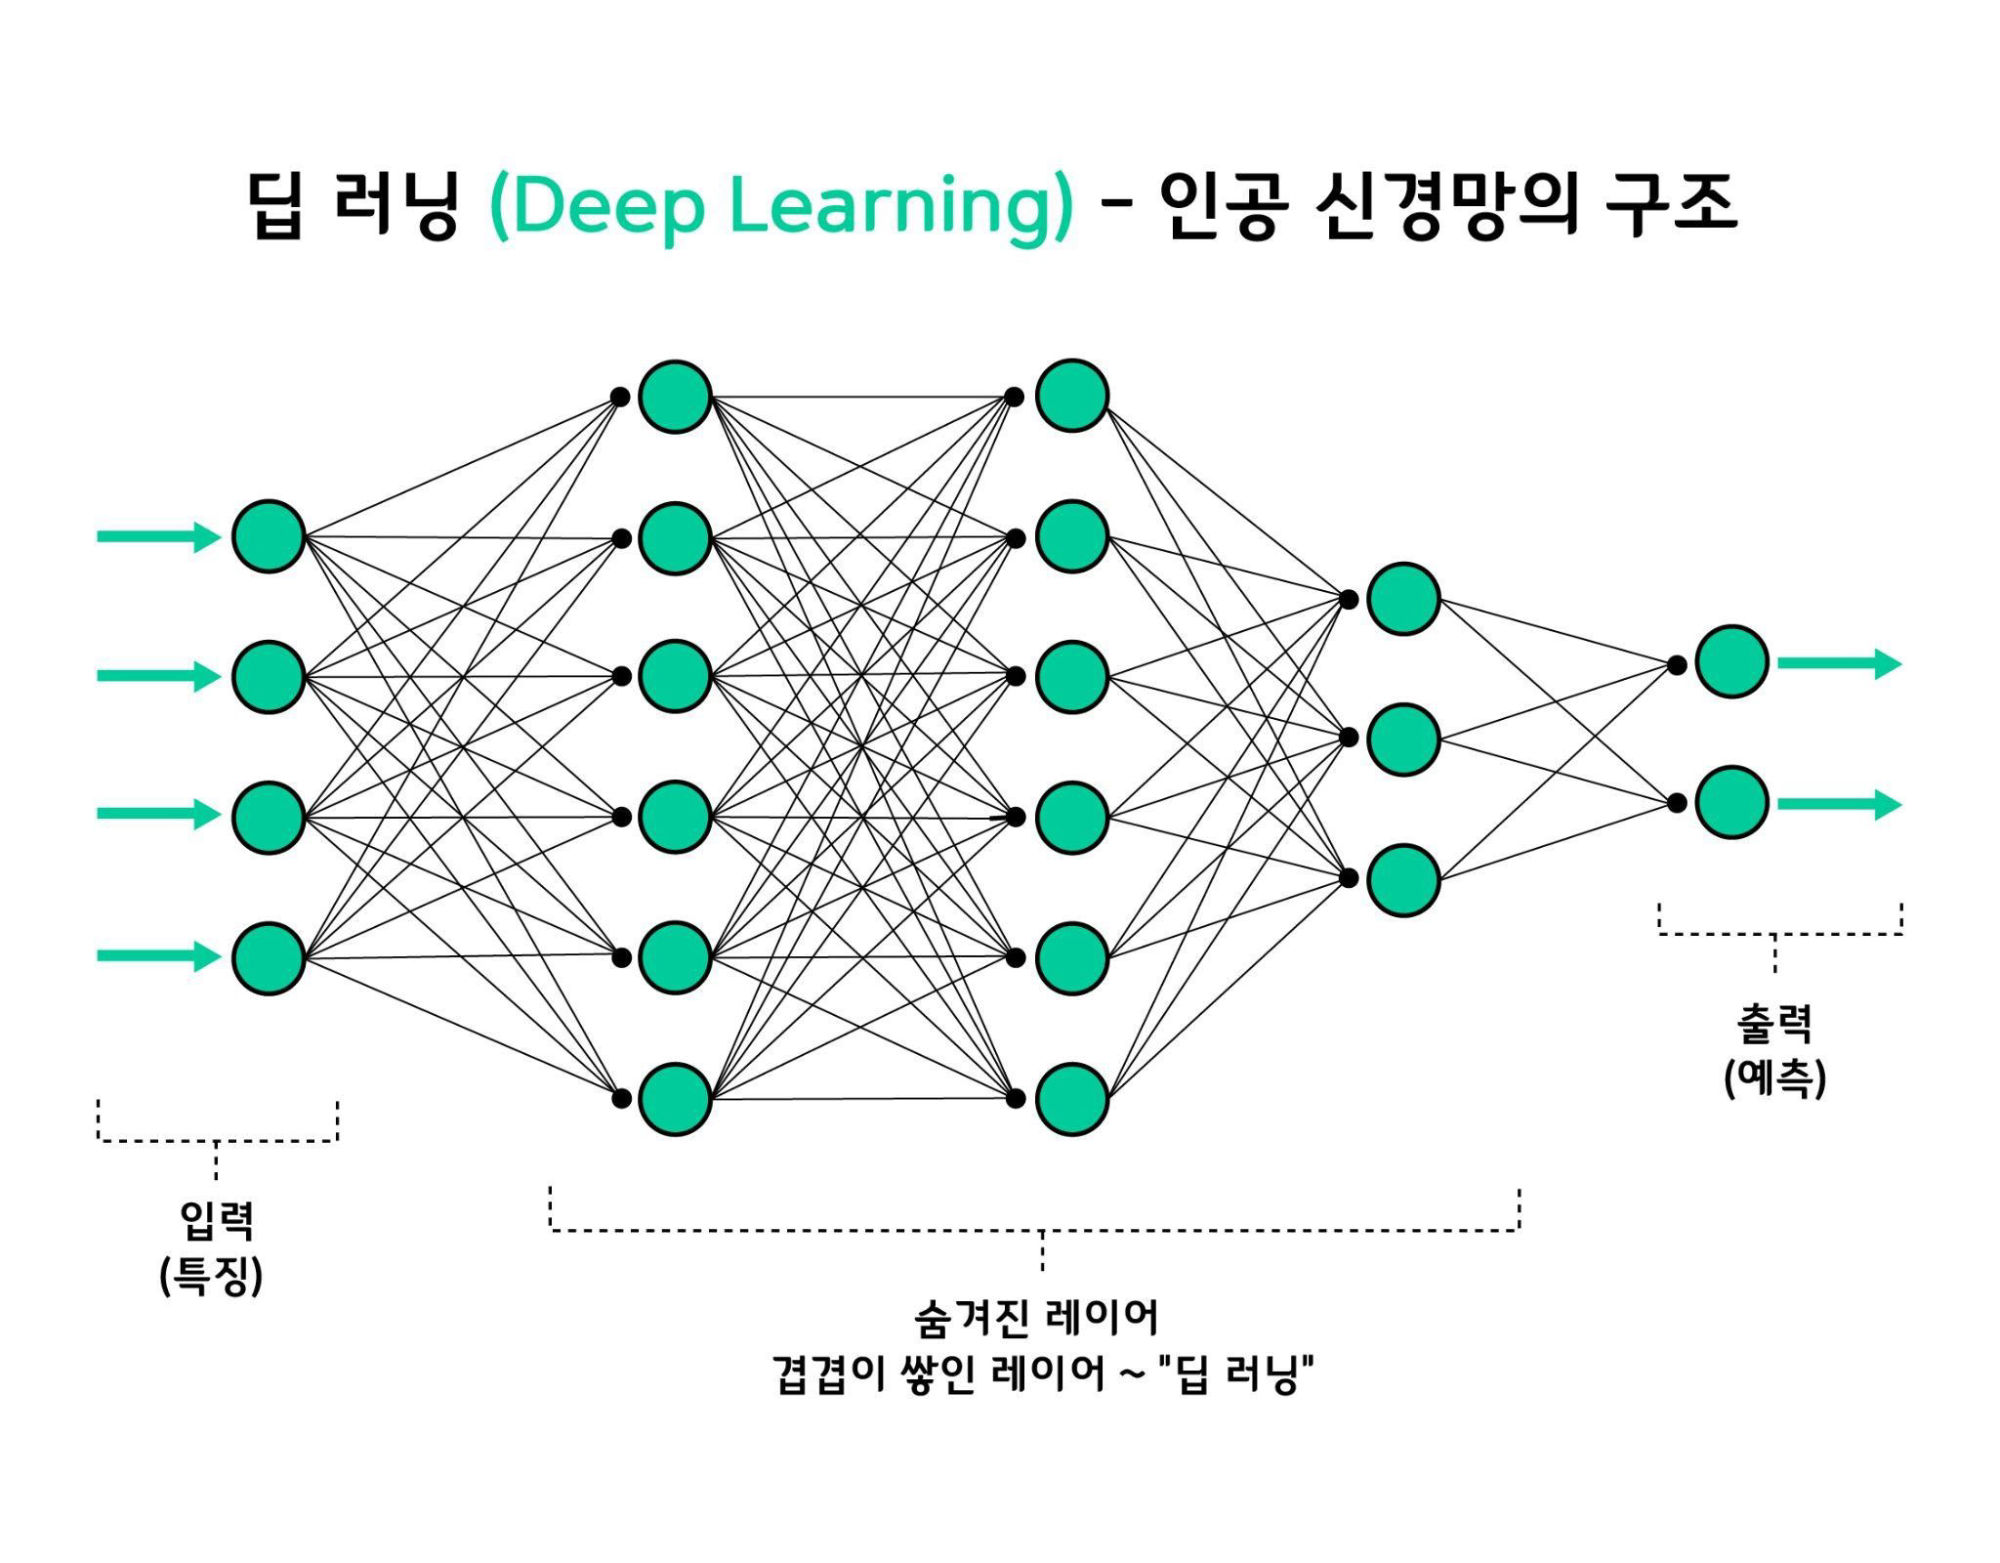

신경망의 핵심 구성 요소는 '층(layer)' 이며, 층은 데이터를 위한 '필터(filter)' 로 생각할 수 있다<br>
좀 더 구체적으로 층은 입력된 데이터로부터 '더 의미있는 표현(representation)' 을 추출한다<br>
(작게 쪼개어 구체화)<br>

대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 '정제' 하는 형태이다<br>
즉 딥러닝 모델은 데이터 정제 필터(층) 가 연속되어 있는 데이터 프로세싱을 위한 '여과기' 와 같다<br>
연속된 층에서 마지막 층은 '소프트맥스(softmax) 분류 층' 이다

* 클래스와 레이블<br>
머신 러닝에서 분류 문제의 범주(category) 를 '클래스(class)' 라고 한다<br>
데이터 포인트는 샘플(sample) 이라고 하며, 특정 샘플의 클래스를 레이블(label) 이라고 한다

In [23]:
#케라스에서 MNIST 데이터셋 로드하기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
train_images   #입력값
train_labels   #정답

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
train_images[0]       #첫번째
train_images[59999]   #마지막

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
np.set_printoptions(linewidth = 28*28)
print(train_images[0])    #숫자 '0' : 검은색이라고 생각하면 됨

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

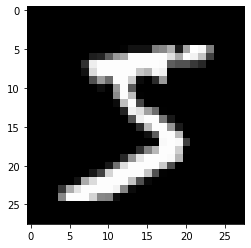

In [32]:
#이미지 로드
plt.imshow(train_images[0], cmap="gray");

In [33]:
np.set_printoptions(linewidth = 28*28)
print(train_images[1])    #숫자 '0' : 검은색이라고 생각하면 됨

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

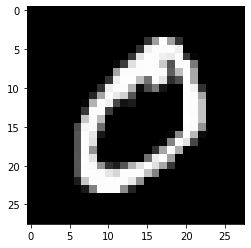

In [34]:
#이미지 로드
plt.imshow(train_images[1], cmap="gray");

In [35]:
train_labels[1]

0

In [36]:
#신경망 구조
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense

In [39]:
#이미지 데이터 준비
#딥러닝에서는 정수가 아닌 '소수' 를 다룬다 (컴퓨터는 '소수' 를 다루는 것이 메모리 사용이 더 적어 좋다)

## train_set
#3차원 -> 2차원 변환
train_images = train_images.reshape(60000, 28*28)

#정수 --> 소수 변환
train_images = train_images / 255.0


## test_set
#3차원 -> 2차원 변환
test_images = test_images.reshape(10000, 28*28)

#정수 --> 소수 변환
test_images = test_images / 255.0

In [40]:
model = Sequential()

#layer(층) 2개 생성
model.add(Dense(512, activation='relu'))
model.add(Dense(10,  activation='softmax'))

In [41]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [45]:
print(60000 / 128)
print(10000 / 128)

468.75
78.125


In [42]:
#batch_size : 한 묶음(batch) 의 크기 (사진 128장을 한번에 처리하고자 한다)
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.2551 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1041 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0492 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0365 - accuracy: 0.9895


In [43]:
pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [51]:
print(len(pred))
print(len(pred[0]))
pred[0]

10000
10


array([1.6901669e-08, 1.3939644e-10, 3.6978324e-07, 9.2161749e-04, 3.0861966e-11, 2.1774993e-07, 2.8129700e-14, 9.9905020e-01, 2.8549262e-06, 2.4799901e-05], dtype=float32)

In [48]:
test_labels[0]

7

In [54]:
pred[0].round(1)    #원-핫 인코딩 결과와 비슷하다

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [55]:
#새로운 데이터에서 모델 평가하기
#예측 및 실제값과 예측값의 결과 비교
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9750


[0.0757610946893692, 0.9750000238418579]

In [58]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss, accuracy = model.evaluate(test_images, test_labels)

print(f"'손실은 {np.round(loss, 4)} 이고 정확도는 {np.round(accuracy, 4)} 이다")

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0080 - accuracy: 0.9977
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0061 - accuracy: 0.9982
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0047 - accuracy: 0.9987
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9813
'손실은 0.0844 이고 정확도는 0.9813 이다


# 221121

## 2-2. 신경망을 위한 데이터 표현

### * 텐서(Tensor) : 다차원 배열(np.array)
머신러닝의 기본 구성 요소<br>
데이터를 위한 컨테이너 (데이터를 담는다)<br>
일반적인 개념(가장 큰 개념), 넘파이에서는 텐서를 array 라고 부른다

* 1차원 배열 : 벡터 (랭크-1 텐서, 1D 텐서)<br>
5D 벡터 : 하나의 축을 따라 5개의 차원을 가진 것<br>
5D 텐서 : 5개의 축을 가진 것<br>

* 2차원 배열 : 행렬 (랭크-2 텐서, 2D 텐서)<br>
2개의 축 : 행(row)과 열(column)<br>

* 3차원 이상 : 텐서 (랭크 3 텐서, 3D 텐서와 더 높은 텐서)<br>


#### 텐서의 핵심 속성
* 축의 개수 (랭크)<br>
3D 텐서 - 3개의 축, 행렬 - 2개의 축<br>
'ndim' 속성에 저장되어 있다<br>

* 크기 (shape)<br>
텐서의 각 축을 따라 얼마나 많은 차원이 있는지 나타냄 (튜플형태)<br>

* 데이터 타입 (dtype)<br>
텐서에 포함된 데이터의 타입<br>
float16, float32, float64, unit8 등이 될 수 있다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#케라스 패키지
import keras

In [2]:
from keras import Sequential
from keras import optimizers   #optimizer : 손실함수를 통해 얻은 손실값으로부터 모델을 업데이트(수정)하는 방식
from keras.layers import Input, Dense

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
#차원 수, 축의 개수 (랭크)
train_images.ndim

3

In [5]:
#배열의 크기
train_images.shape

(60000, 28, 28)

shape 실행 결과값의 의미 --> (이미지 개수, height, width, (컬러/흑백 여부))

In [6]:
#데이터 타입
train_images.dtype

dtype('uint8')

- "unsigned int 8"<br>
8bit = 1 byte<br>
2**8 = 256 (256개 : -128 부터 127 까지)<br>
'unsigned' : 모든 것을 다 숫자로 표현해라

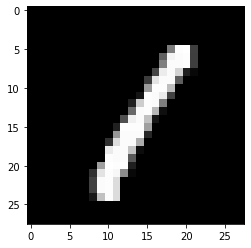

In [7]:
#train_images[3, :, :]
plt.imshow(train_images[3,:,:], cmap='gray')

### * 넘파이로 텐서 조작하기 - 슬라이싱(slicing)

In [8]:
#이미지 슬라이싱 (0~100, 100~200)
silce_1 = train_images[:100]
silce_2 = train_images[100:200]

In [9]:
print(len(silce_1))
print(len(silce_2))
print()
print(silce_1.shape)
print(silce_2.shape)

100
100

(100, 28, 28)
(100, 28, 28)


In [10]:
for n in range(1, 11):
    globals()[f'slice_{n}'] = train_images[100*(n-1) : 100*n]
    #locals['slice_'+str(n)] = train_images[100*(n-1) : 100*n]

In [11]:
slice_5.shape

(100, 28, 28)

### * 텐서의 실제 사례 (데이터의 종류)

#### ① 벡터 데이터
(samples, features) 크기의 랭크-2 텐서 (samples = 데이터의 개수)<br>
각 샘플은 수치 속성(특성, features)으로 구성된 벡터이다<br>

예)<br>
사람의 나이, 성별, 소득으로 구성된 (features 3개) 인구 통계 데이터<br>
각 사람(samples)은 3개의 값(features)을 가진 벡터로 구성되고, 10만명이 포함된 전체 데이터셋은 (100000, 3) 크기의 랭크-2 텐서에 저장될 수 있다

#### ② 시계열 데이터 또는 시퀀스 데이터
(samples, timesteps, features) 크기의 랭크-3 텐서<br>
각 샘플은 특성 벡터의 길이가 timesteps 인 시퀀스 이다<br>
데이터에서 시간 또는 연속된 순서가 중요할 때는 시간 축을 포함하여 랭크-3 텐서로 저장된다

예)<br>
주식 가격 데이터셋 : 1분마다 현재 주식 가격, 지난 1분 동안 최고 가격과 최소 가격 (features=3) 을 저장한다<br>
1분마다 데이터는 3D 벡터로 인코딩되고, '하루' 동안의 거래는 (390, 3) 크기의 행렬로 인코딩된다<br>
250일치의 데이터는 (250, 390, 3) 크기의 랭크-3 텐서로 저장될 수 있다

#### ③ 이미지 데이터
(samples, height(행), width(열), channels) 또는 (samples, channels, height(행), width(열)) 크기의 랭크-4 텐서<br>
각 샘플은 픽셀의 2D 격자고, 각 픽셀은 수치 값(channel)의 벡터이다<br>

이미지는 전형적으로 '높이, 너비, 컬러' 채널의 3차원으로 이루어진다<br>
흑백 이미지는 하나의 컬러 채널만 갖고 있어 랭크-2 텐서로 저장될 수 있지만, 관례상 이미지 텐서는 항상 '랭크-3 텐서' 로 저장된다<br>

흑백 이미지의 경우 컬러 채널의 차원 크기는 '1' 이다<br>
256 x 256 크기의 흑백 이미지에 대한 128개의 데이터 배치는 (128, 256, 256, 1) 크기의 텐서에 저장될 수 있다<br>

컬러 이미지에 대한 128개의 배치는 (128, 256, 256, 3) 크기의 텐서에 저장될 수 있다 (RGB 3색)

#### ④ 비디오 데이터
(samples, frames, height(행), width(열), channels) 또는<br>
(samples, frames, channels, height(행), width(열)) 크기의 랭크-5 텐서<br>
각 샘플은 이미지의 길이가 frames인 시퀀스 이다<br>

하나의 비디오는 프레임의 연속이고, 각 프레임은 하나의 컬러 이미지 이다<br>
프레임이 (height, width, color_depth) 의 랭크-3 텐서로 저장될 수 있기 때문에, 프레임의 연속은<br>
(frames, height, width, color_depth) 의 랭크-4 텐서로 저장될 수 있으며,<br>
따라서 여러 비디오의 배치는 (samples, frames, height, width, color_depth) 의 랭크-5 텐서로 저장될 수 있다<br>

예)<br>
60초 짜리 144 x 256 유튜브 비디오 클립을 '초당 4프레임' 으로 샘플링하면 240 프레임(60x4) 이 된다<br>
이러한 비디오 클립을 '4개' 가진 배치는 (4, 240, 144, 256, 3) 크기의 텐서에 저장되는 것이다

## 4-1. 영화 리뷰 분류 : 이진 분류 문제 (p.147 ~ 159)
리뷰 텍스트를 기반으로 영화 리뷰를 '긍정' 과 '부정' 으로 분류

### ① IMDB 데이터셋
리뷰 5만개로 이루어져 있으며, 훈련 데이터 25,000개와 테스트 데이터 25,000 개로 나뉘어 있고 각각 50%는 긍정, 50%는 부정 리뷰로 구성되어 있다<br>
각 리뷰는 전처리되어 있어 단어 시퀀스가 '숫자 시퀀스' 로 변환되어 있다

In [49]:
#IMDB 데이터 세트 로드하기
from keras.datasets import imdb

In [50]:
#num_words = 10000 : 리뷰에 사용된 단어 중 가장 자주 나타나는 단어 10000개만 사용한다
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [51]:
print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


In [52]:
#영화 리뷰를 담은 배열 : train_data, test_data
#각 리뷰는 단어 인덱스의 리스트(단어 시퀀스가 인코딩된 것)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [53]:
#포함되어있는 단어의 개수
len(train_data[0])

218

In [54]:
#train_labels, test_labels : 부정을 나타내는 '0'과 긍정을 나타내는 '1' 의 리스트
train_labels
np.unique(train_labels)

array([0, 1], dtype=int64)

In [55]:
#리뷰를 다시 텍스트로 디코딩하기
word_index = imdb.get_word_index()    #단어와 인덱스가 매핑되어 있는 딕셔너리
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [56]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [57]:
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### ② 데이터 준비
신경망에 숫자 리스트를 바로 주입할 수는 없다<br>
숫자 리스트는 모두 길이가 다르지만, 신경망은 동일한 크기의 배치를 기대하기 때문이다<br>
따라서 리스트를 텐서로 바꾸어야 한다

In [58]:
#정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
def vectorize_sequences(sequences, dimension=10000):
    #크기가 (len(squences), dimension) 이고, 모든 원소가 0인 행렬 생성
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        for j in sequence:
            #results[i]에서 sequence에 있는 값만 1로 만듬
            results[i, j] = 1.
    
    return results

In [59]:
#훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)

#테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

In [8]:
np.array(1/255).dtype

dtype('float64')

In [61]:
y_train = np.asarray(train_labels).astype('float32')    #'float32' 가 'float64' 보다 처리속도가 더 빠르다
y_test = np.asarray(test_labels).astype('float32')

In [62]:
x_train.shape

(25000, 10000)

In [63]:
x_train[0][-100:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [64]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

### ③ 신경망 모델 만들기
입력 데이터가 벡터고 레이블은 스칼라(1 또는 0) 이다<br>
이에 가장 잘 작동하는 모델은 'relu' 활성화 함수를 사용한 밀집 연결층을 쌓은 것이다

#### Dense 층을 쌓을 때 고려해야하는 구조상의 결정
-얼마나 많은 층을 사용할 것인가<br>
-각 층에 얼마나 많은 유닛을 둘 것인가<br>
--> 16개의 유닛을 가진 '2개' 의 중간층 & 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 3번째 층

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [ ]:
from keras import Sequential
from keras import optimizers
from keras.layers import Input, Dense

In [65]:
#모델 정의하기
model = Sequential([
    #16개의 유닛을 가진 '2개' 의 중간층
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    
    #현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 3번째 층
    Dense(1, activation='sigmoid'),    
])

In [66]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

확률을 출력하는 모델을 사용할 때는 crossentropy 가 최선의 선택이다<br>
crossentropy 는 정보 이론 분야에서 온 개념으로, 확률 분포 간의 차이를 측정한다

### ④ 훈련 검증
딥러닝에서는 훈련 데이터에서 평가하지 않고, 반드시 '검증 세트' 를 사용하여 훈련 과정 중에 모델의 정확도를 모니터링한다

In [67]:
x_train.shape

(25000, 10000)

In [68]:
#검증 세트 준비하기
partial_x_train = x_train[:15000]
x_val = x_train[15000:]

partial_y_train = y_train[:15000]
y_val = y_train[15000:]

In [69]:
#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,         #샘플을 512개씩 묶어 미니 배치를 만들고, 20번의 에포크 동안 모델을 훈련시킨다
                    validation_data=(x_val, y_val))    #동시에 따로 떼어놓은 1만 개의 샘플에서 손실과 정확도를 측정한다

Epoch 1/20
30/30 [==============================] - 22s 514ms/step - loss: 0.5157 - accuracy: 0.7845 - val_loss: 0.3858 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3103 - accuracy: 0.9038 - val_loss: 0.3031 - val_accuracy: 0.8904
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2290 - accuracy: 0.9247 - val_loss: 0.2810 - val_accuracy: 0.8933
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1802 - accuracy: 0.9436 - val_loss: 0.2782 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1462 - accuracy: 0.9541 - val_loss: 0.2774 - val_accuracy: 0.8916
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1210 - accuracy: 0.9636 - val_loss: 0.3347 - val_accuracy: 0.8739
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1001 - accuracy: 0.9717 - val_loss: 0.3060 - val_accuracy: 0.8857
Epoch 8/20


model.fit() 메서드는 History 객체를 반환한다<br>
이 객체는 훈련하는 동안 발생한 모든 정보를 담고있는 딕셔너리인 history 속성을 가지고 있다

In [71]:
history.history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [72]:
#모의고사를 학습한 결과(정확도)
history.history['accuracy']

[0.7845333218574524,
 0.9038000106811523,
 0.9247333407402039,
 0.9435999989509583,
 0.9541333317756653,
 0.9635999798774719,
 0.971666693687439,
 0.9787333607673645,
 0.9819333553314209,
 0.987666666507721,
 0.9895333051681519,
 0.9929999709129333,
 0.9946666955947876,
 0.9957333207130432,
 0.9977333545684814,
 0.9990666508674622,
 0.9976000189781189,
 0.9995999932289124,
 0.9987999796867371,
 0.9997333288192749]

In [73]:
#신유형의 문제를 학습한 결과(정확도)
history.history['val_accuracy']

[0.8690000176429749,
 0.8903999924659729,
 0.8932999968528748,
 0.8913999795913696,
 0.8916000127792358,
 0.8738999962806702,
 0.885699987411499,
 0.8840000033378601,
 0.8794999718666077,
 0.8805999755859375,
 0.8773000240325928,
 0.8733000159263611,
 0.8722000122070312,
 0.871399998664856,
 0.8723999857902527,
 0.8623999953269958,
 0.867900013923645,
 0.8661999702453613,
 0.8669999837875366,
 0.8636999726295471]

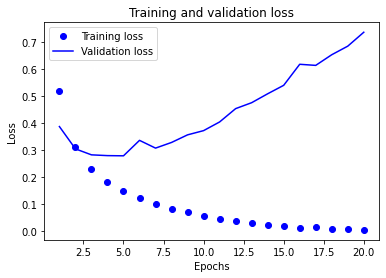

In [74]:
#훈련과 검증 손실 그리기
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss_values, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

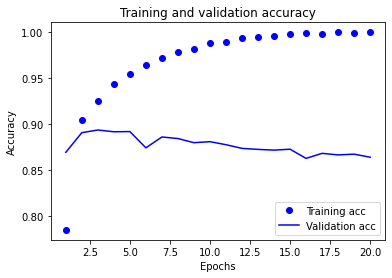

In [75]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

훈련 손실은 에포크마다 감소, 훈련 정확도는 에포크 마다 증가 한다<br>
검증 손실도는 이와 같지 않다 즉 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에서는 잘 작동하지 않을 수 있는 것이다<br>
이를 '과대적합' 되었다고 말한다<br>

네 번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로,<br>
훈련 데이터 세트 외에는 일반화 되지 못한다<br>

이러한 경우 과대적합을 방지하기 위해 네 번째 에포크 이후에 훈련을 중지할 수 있다 (과대적합 완화)

In [76]:
#모델을 처음부터 다시 훈련하기

#모델 정의하기
model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),    
])

#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [77]:
#네 번의 에포크 동안만 훈련하고, 바로 테스트 데이터에서 평가

model.fit(x_train, y_train, epochs=4, batch_size=512)
model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.4658 - accuracy: 0.8114
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2651 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2017 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 9s 2ms/step - loss: 0.3113 - accuracy: 0.8759


[0.3113013803958893, 0.8758800029754639]

테스트 손실 : 0.3113, 테스트 정확도 : 0.8759

### ⑤ 훈련된 모델로 새로운 데이터 예측

In [78]:
#훈련된 모델로 새로운 데이터 예측
preds = model.predict(x_test)
preds

782/782 [==============================] - 2s 1ms/step


array([[0.16197717],
       [0.9999452 ],
       [0.5291201 ],
       ...,
       [0.11198042],
       [0.06177761],
       [0.559709  ]], dtype=float32)

In [79]:
preds[:4]

array([[0.16197717],
       [0.9999452 ],
       [0.5291201 ],
       [0.6655815 ]], dtype=float32)

이 모델은 어떤 샘플에 대해서는 확신을 가지고 있지만 (0.99 이상 또는 0.01 이하), 어떤 샘플에 대해서는 확신이 부족하다(0.6, 0.4)

### ⑥ 추가 실험

#### Dense 층의 개수 변화

* 중간층 3개

In [80]:
#모델 정의하기
model = Sequential([
    #16개의 유닛을 가진 '3개' 의 중간층
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    
    #현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 4번째 층
    Dense(1, activation='sigmoid'),    
])

In [81]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

In [82]:
#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,         #샘플을 512개씩 묶어 미니 배치를 만들고, 20번의 에포크 동안 모델을 훈련시킨다
                    validation_data=(x_val, y_val))    #동시에 따로 떼어놓은 1만 개의 샘플에서 손실과 정확도를 측정한다

Epoch 1/20
30/30 [==============================] - 10s 127ms/step - loss: 0.5426 - accuracy: 0.7715 - val_loss: 0.3974 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3162 - accuracy: 0.8992 - val_loss: 0.3132 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2252 - accuracy: 0.9261 - val_loss: 0.2934 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1757 - accuracy: 0.9406 - val_loss: 0.2792 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 16ms/step - loss: 0.1395 - accuracy: 0.9546 - val_loss: 0.3191 - val_accuracy: 0.8774
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1136 - accuracy: 0.9645 - val_loss: 0.3074 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0911 - accuracy: 0.9725 - val_loss: 0.3302 - val_accuracy: 0.8834
Epoch 8/20


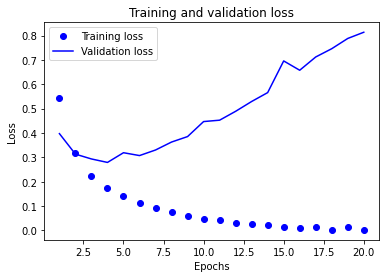

In [83]:
#훈련과 검증 손실 그리기
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss_values, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

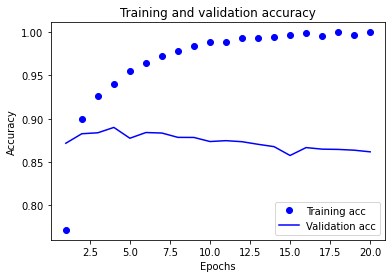

In [84]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

* 중간층 1개

In [85]:
#모델 정의하기
model = Sequential([
    #16개의 유닛을 가진 '1개' 의 중간층
    Dense(16, activation='relu'),
   
    #현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 2번째 층
    Dense(1, activation='sigmoid'),    
])

In [86]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

In [87]:
#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,         #샘플을 512개씩 묶어 미니 배치를 만들고, 20번의 에포크 동안 모델을 훈련시킨다
                    validation_data=(x_val, y_val))    #동시에 따로 떼어놓은 1만 개의 샘플에서 손실과 정확도를 측정한다

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.5076 - accuracy: 0.7929 - val_loss: 0.3917 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3250 - accuracy: 0.8985 - val_loss: 0.3338 - val_accuracy: 0.8731
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2509 - accuracy: 0.9207 - val_loss: 0.2952 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2062 - accuracy: 0.9375 - val_loss: 0.2881 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1744 - accuracy: 0.9461 - val_loss: 0.3064 - val_accuracy: 0.8752
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1520 - accuracy: 0.9552 - val_loss: 0.2736 - val_accuracy: 0.8925
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1329 - accuracy: 0.9617 - val_loss: 0.2791 - val_accuracy: 0.8898
Epoch 8/20
30

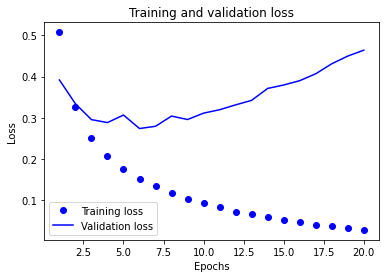

In [88]:
#훈련과 검증 손실 그리기
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss_values, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

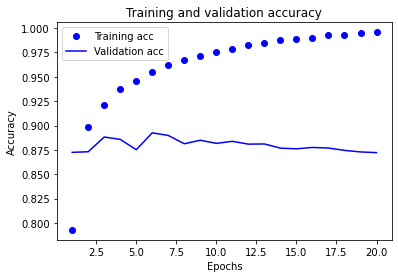

In [89]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

#### 층의 유닛수 변화

* 유닛수 32개

In [90]:
#모델 정의하기
model = Sequential([
    #32개의 유닛을 가진 '2개' 의 중간층
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    
    #현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 3번째 층
    Dense(1, activation='sigmoid'),    
])

In [91]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

In [92]:
#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,         #샘플을 512개씩 묶어 미니 배치를 만들고, 20번의 에포크 동안 모델을 훈련시킨다
                    validation_data=(x_val, y_val))    #동시에 따로 떼어놓은 1만 개의 샘플에서 손실과 정확도를 측정한다

Epoch 1/20
30/30 [==============================] - 19s 36ms/step - loss: 0.5065 - accuracy: 0.7753 - val_loss: 0.4006 - val_accuracy: 0.8323
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2892 - accuracy: 0.8999 - val_loss: 0.2923 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2031 - accuracy: 0.9311 - val_loss: 0.2766 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1609 - accuracy: 0.9463 - val_loss: 0.2775 - val_accuracy: 0.8918
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1219 - accuracy: 0.9609 - val_loss: 0.2959 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1050 - accuracy: 0.9663 - val_loss: 0.3221 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0825 - accuracy: 0.9759 - val_loss: 0.3544 - val_accuracy: 0.8800
Epoch 8/20
3

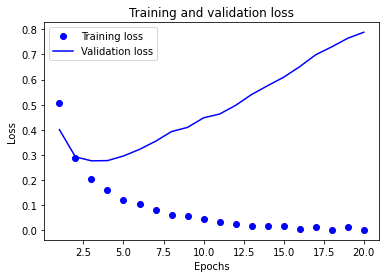

In [93]:
#훈련과 검증 손실 그리기
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss_values, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

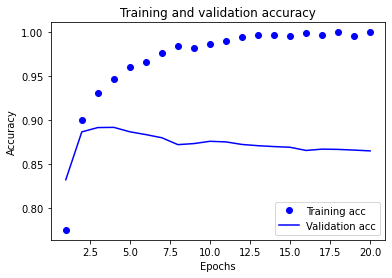

In [94]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

* 유닛수 64개

In [95]:
#모델 정의하기
model = Sequential([
    #64개의 유닛을 가진 '2개' 의 중간층
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    
    #현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 3번째 층
    Dense(1, activation='sigmoid'),    
])

In [96]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

In [97]:
#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,         #샘플을 512개씩 묶어 미니 배치를 만들고, 20번의 에포크 동안 모델을 훈련시킨다
                    validation_data=(x_val, y_val))    #동시에 따로 떼어놓은 1만 개의 샘플에서 손실과 정확도를 측정한다

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.4755 - accuracy: 0.7865 - val_loss: 0.4141 - val_accuracy: 0.8188
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2613 - accuracy: 0.9001 - val_loss: 0.3085 - val_accuracy: 0.8742
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1871 - accuracy: 0.9304 - val_loss: 0.3041 - val_accuracy: 0.8803
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1383 - accuracy: 0.9515 - val_loss: 0.3139 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1081 - accuracy: 0.9626 - val_loss: 0.3181 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0803 - accuracy: 0.9722 - val_loss: 0.4602 - val_accuracy: 0.8606
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.3789 - val_accuracy: 0.8826
Epoch 8/20
30

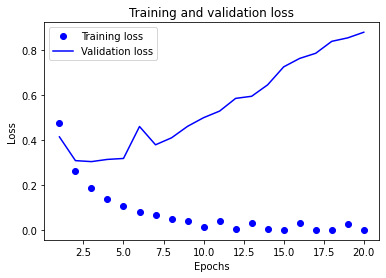

In [98]:
#훈련과 검증 손실 그리기
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss_values, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

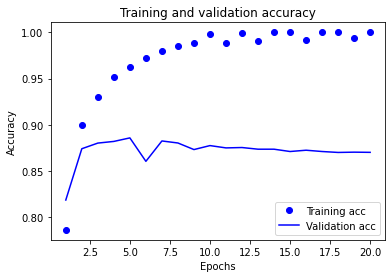

In [99]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

#### binary_crossentropy 대신 mse 손실 함수 사용

In [100]:
#모델 정의하기
model = Sequential([
    #16개의 유닛을 가진 '2개' 의 중간층
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    
    #현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 3번째 층
    Dense(1, activation='sigmoid'),    
])

In [101]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'mean_squared_error',
             metrics = 'accuracy')

In [102]:
#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,         #샘플을 512개씩 묶어 미니 배치를 만들고, 20번의 에포크 동안 모델을 훈련시킨다
                    validation_data=(x_val, y_val))    #동시에 따로 떼어놓은 1만 개의 샘플에서 손실과 정확도를 측정한다

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.1714 - accuracy: 0.7842 - val_loss: 0.1235 - val_accuracy: 0.8645
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0934 - accuracy: 0.9055 - val_loss: 0.1040 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0682 - accuracy: 0.9287 - val_loss: 0.0862 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0518 - accuracy: 0.9463 - val_loss: 0.0826 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0416 - accuracy: 0.9576 - val_loss: 0.0835 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0333 - accuracy: 0.9677 - val_loss: 0.0836 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0271 - accuracy: 0.9741 - val_loss: 0.0857 - val_accuracy: 0.8847
Epoch 8/20
30

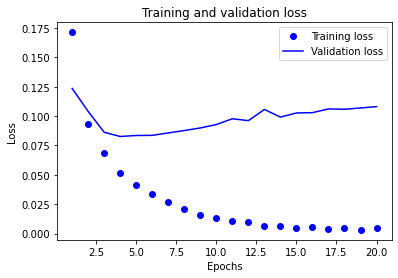

In [103]:
#훈련과 검증 손실 그리기
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss_values, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

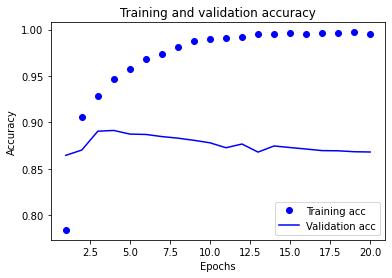

In [104]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

#### relu 대신 tanh 활성화 함수 사용

In [105]:
#모델 정의하기
model = Sequential([
    #16개의 유닛을 가진 '2개' 의 중간층
    Dense(16, activation='tanh'),
    Dense(16, activation='tanh'),
    
    #현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 3번째 층
    Dense(1, activation='sigmoid'),    
])

In [106]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

In [107]:
#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,         #샘플을 512개씩 묶어 미니 배치를 만들고, 20번의 에포크 동안 모델을 훈련시킨다
                    validation_data=(x_val, y_val))    #동시에 따로 떼어놓은 1만 개의 샘플에서 손실과 정확도를 측정한다

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.4994 - accuracy: 0.8009 - val_loss: 0.3774 - val_accuracy: 0.8724
Epoch 2/20
30/30 [==============================] - 1s 16ms/step - loss: 0.2958 - accuracy: 0.9077 - val_loss: 0.2942 - val_accuracy: 0.8898
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2098 - accuracy: 0.9323 - val_loss: 0.3104 - val_accuracy: 0.8690
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1569 - accuracy: 0.9503 - val_loss: 0.2735 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1227 - accuracy: 0.9613 - val_loss: 0.2955 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0996 - accuracy: 0.9702 - val_loss: 0.3190 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0786 - accuracy: 0.9774 - val_loss: 0.3654 - val_accuracy: 0.8797
Epoch 8/20
30

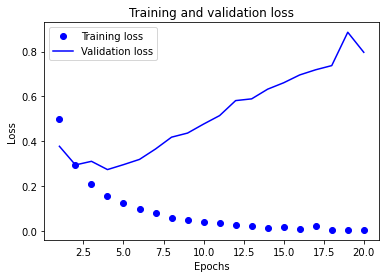

In [108]:
#훈련과 검증 손실 그리기
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss_values, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

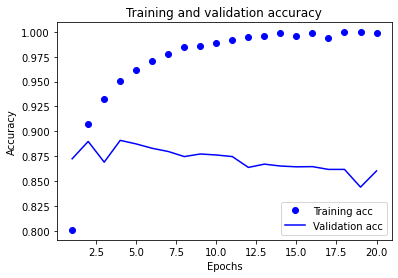

In [109]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

# 221122

### * 분류와 회귀에서 사용하는 용어
* 샘플 또는 입력 : 모델에 주입될 하나의 데이터 포인트(data point)<br>
* 예측 또는 출력 : 모델로부터 나오는 값<br>
* 타깃 : 정답. 외부 데이터 소스에 근거하여 모델이 완벽하게 예측해야하는 값<br>
* 예측 오차 또는 손실 값 : 모델의 예측과 타깃 사이의 거리를 측정한 값<br>
* 클래스 : 분류 문제에서 선택할 수 있는 레이블의 집합<br>
(예 : 고양이와 강아지 사진 분류 --> 클래스는 '고양이', '강아지' 총 2개)<br>
* 레이블 : 분류 문제에서 클래스 할당의 구체적인 사례<br>
(예: 사진 #1234 에 '강아지' 클래스가 들어 있다고 표시한다면, '강아지' 는 사진 #1234 의 레이블이 된다)

## 2-3. 텐서 연산
컴퓨터 프로그램을 AND, OR 등의 이항 연산으로 표현할 수 있는 것처럼,<br>
심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 '텐서 연산' 으로 나타낼 수 있다<br>
(텐서 덧셈이나 텐서 곱셈 등)

### * 텐서 연산 함수 : output = relu(dot(W, input) + b)

① 입력 텐서와 텐서 W 사이의 점곱(dot, 내적, 스칼라곱)<br>
② 점곱으로 만들어진 행렬과 벡터 b 사이의 덧셈<br>
③ relu 연산 (relu(x) = max(x, 0))

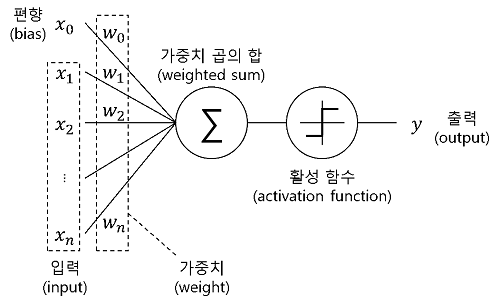

* 점곱(dot product) : 곱하고 더한다<br>
(1,2,3) * (3,2,1) = (3,4,3) --> numpy 의 곱셈 (element-wise)<br>
(1,2,3) · (3,2,1) = 10      --> dot product

#### relu 함수
x > 0   -->  x<br>
x <= 0  -->  0<br>

--> np.maximum(0, x)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(-1, 1, 100)

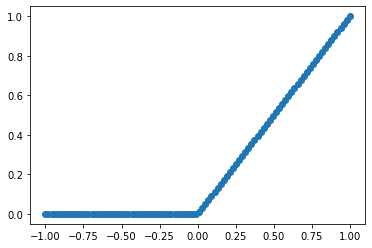

In [4]:
plt.scatter(x, np.maximum(0, x))

#### sigmoid 함수
1 / (1+e^(-x))<br>

e = 2.71818 ... 이므로, 'e = 2.7' 로 가정한다<br>
e^x : 지수함수 (x=0 일때 1이고, 기울기가 양수)<br>
e^(-x) : x=0 일때 1이고, 기울기가 음수

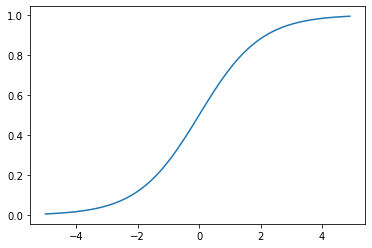

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.show()

#### tanh 함수
시그모이드와 비슷하지만 실수 값을 입력받아 -1~1 사이의 값으로 압축한다<br>
시그모이드를 두배 해주고 -1 한 값과 같다<br>

tanh는 결괏값이 -1~1 사이로 zero-centered 하여 지그재그가 덜하기 때문에 시그모이드에 비해 최적화를 잘하지만,<br>
시그모이드와 같이 기울기 소실 문제를 가지고 있다<br>

https://happy-obok.tistory.com/55

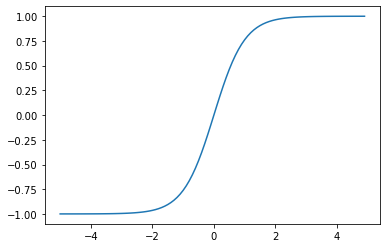

In [19]:
#tanh 의 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = ( np.exp(x) - np.exp(-x) ) / ( np.exp(x) + np.exp(-x) )

plt.plot(x, y)
plt.show()

### * 원소별 연산 (p.76)
relu 함수와 덧셈은 '원소별 연산 (element-wise operation)' 이다<br>
이 연산은 텐서에 있는 각 원소에 독립적으로 적용된다 (병렬 구현이 가능한 연산)<br>
파이썬으로는 'for 반복문' 을 사용하여 원소별 연산을 구현할 수 있으며,<br>
같은 원리로 원소별 곱셈, 뺄셈 등도 할 수 있다

In [ ]:
def navie_relu(x):
    assert len(x.shape) == 2    #x는 랭크-2 넘파이 배열
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    
    return x

In [ ]:
def navie_add(x, y):
    assert len(x.shape) == 2    #x는 랭크-2 넘파이 배열
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    
    return x

### * 브로드 캐스팅
크기가 다른 두 텐서가 더해질 때는 작은 텐서가 큰 텐서의 크기에 맞추어 '브로드 캐스팅' 된다<br>

① 큰 텐서의 ndim 에 맞도록 작은 텐서에 새로운 축 추가 (차원 변경)<br>
② 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨

In [9]:
a = np.random.randint(1, 5, 6)
a    #a는 벡터 (1차원 텐서)

array([2, 2, 2, 4, 2, 2])

In [10]:
a.shape

(6,)

#### 차원 변경 (축 추가)

* 2차원으로 변환

In [11]:
#2차원으로 변환
a.reshape(-1, 1)

array([[2],
       [2],
       [2],
       [4],
       [2],
       [2]])

In [12]:
a.reshape(-1, 1).shape

(6, 1)

In [14]:
a[:, np.newaxis].shape

(6, 1)

In [16]:
a[np.newaxis, :].shape

(1, 6)

In [19]:
np.expand_dims(a, axis=0).shape

(1, 6)

In [20]:
np.expand_dims(a, axis=1).shape

(6, 1)

In [23]:
a = a.reshape(2, 3)
a

array([[2, 2, 2],
       [4, 2, 2]])

In [24]:
a.shape

(2, 3)

* 3차원으로 변환

In [33]:
#3차원으로 변환
a[:, :, np.newaxis]

array([[[2],
        [2],
        [2]],

       [[4],
        [2],
        [2]]])

In [34]:
a[:, :, np.newaxis].shape

(2, 3, 1)

In [32]:
a.reshape((2,3) + (1, ))

array([[[2],
        [2],
        [2]],

       [[4],
        [2],
        [2]]])

### * 텐서 곱셈 (점곱) : np.dot()
원소 개수가 같은 벡터끼리 점곱이 가능하다

In [2]:
a = np.random.randint(1, 5, 3)
a

array([3, 1, 2])

In [3]:
b = np.random.randint(1, 5, 3)
b

array([3, 3, 3])

In [4]:
a * b

array([9, 3, 6])

In [5]:
#dot product
print(a @ b)
print(np.dot(a, b))

18
18


In [6]:
#텐서 연산 함수 : output = relu(dot(W, input) + b)
#relu 함수 = np.maximum(0, x)
np.maximum(0, (np.dot(a, b) + 2))

20

In [7]:
a = np.random.randint(-5, 5, 3)
b = np.random.randint(-5, 5, 3)
np.maximum(0, (np.dot(a, b) + 2))

0

## 4-2. 뉴스 기사 분류 : 다중 분류 문제 (p.160 ~ 169)
로이터(Reuter) 뉴스를 46개의 상호 배타적인 토픽으로 분류<br>

클래스가 많기 때문에 '다중 분류' 에 해당하며, 특히 각 데이터 포인트가 '정확히 하나의 범주로 분류' 되기 때문에<br>
'단일 레이블 다중 분류' 이다

* 다중 분류 multiclass classification 의 종류<br>
single-label : 정치, 체육, 문화, ...<br>
multi-label : (경제 & 정치), (부동산 & 교통), ...

### ① 로이터 데이터셋
이 데이터셋은 46개의 토픽이 있으며, 어떤 토픽은 다른 것에 비해 데이터가 많다<br>
각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다

In [2]:
#로이터 데이터세트 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
#num_words = 10000 : 데이터에서 가장 자주 등장하는 단어 1만개로 제한

In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
#로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [8]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [9]:
decoded_newswire = " ".join(
    [reverse_word_index.get(i) for i in train_data[0]])
decoded_newswire

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

### ② 데이터 준비
신경망에 숫자 리스트를 바로 주입할 수는 없다<br>
숫자 리스트는 모두 길이가 다르지만, 신경망은 동일한 크기의 배치를 기대하기 때문이다<br>
따라서 리스트를 텐서로 바꾸어야 한다

#### data 전처리

In [10]:
#데이터 인코딩하기 (멀티-핫 인코딩)
def vectorize_sequences(sequences, dimension=10000):
    #크기가 (len(squences), dimension) 이고, 모든 원소가 0인 행렬 생성
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        for j in sequence:
            #results[i]에서 sequence에 있는 값만 1로 만듬
            results[i, j] = 1.
    
    return results

In [11]:
#훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)

#테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

In [12]:
len(x_train[0])

10000

In [13]:
#최대값 위치 반환 : np.argmax()
np.argmax(train_data[0])

56

In [14]:
len(train_data[0])

87

In [15]:
#train_data[0]
train_data[0][56]    #최대값은?

4579

In [16]:
x_train[0][4579]

1.0

In [17]:
x_train.shape

(8982, 10000)

#### labels 전처리 (레이블을 벡터로)
- 정수 텐서 변환<br>
- 원-핫 인코딩 (범주형 인코딩)

'원-핫 인코딩' 이 범주형 데이터에 널리 사용되기 때문에 '범주형 인코딩' 이라고도 부르며,<br>
이 경우는 원-핫 인코딩의 결과로 각 레이블의 인덱스 자리는 '1', 나머지는 모두 '0' 인 벡터가 된다

In [18]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [19]:
train_labels.max()

45

In [20]:
#레이블 인코딩하기 (원-핫 인코딩)
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [21]:
train_labels[0]

3

In [22]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_train.shape

(8982, 46)

### ③ 모델 구성
이 분류 문제는 이전의 영화 리뷰 분류 문제와는 다르게, 출력 클래스의 개수가 '46' 개 이다 (영화 리뷰 분류 문제는 출력 클래스 '2' 개)<br>
즉 출력 공간의 차원이 훨씬 큰 것이다

Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있다<br>
따라서 한 층이 일부 정보를 누락하면, 그 다음 층에서 이를 복원할 방법이 없다<br>

이전 예제에서 사용한 16차원 공간은 (units=16) 46개의 클래스를 구분하기에는 제약이 많으므로,<br>
unit 의 개수를 '64개' 로 늘려 좀 더 규모가 큰 층을 사용한다

In [24]:
import keras
from keras import Sequential
from keras import optimizers
from keras.layers import Input, Dense

In [25]:
#모델 정의하기
model = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=46, activation='softmax'),
])

* 주목해야할 점<br>

① 마지막 Dense 층의 크기가 '46' (units=46) : <br>
각 입력 샘플에 대해 46차원의 벡터를 출력한다는 뜻이다<br>
N개의 클래스로 데이터 포인트를 분류하려면, 모델의 마지막 Dense 층의 크기는 N 이어야 한다<br>
이 벡터의 각 원소 (각 차원) 는 각기 다른 출력 클래스가 인코딩된 것이다<br>

② 마지막 Dense 층에 사용된 활성화 함수 'softmax' : <br>
각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력한다<br>
즉, 46차원의 출력 벡터를 만들며, output[i] 는 어떤 샘플이 클래스 i에 속할 확률이다<br>
46개의 값을 모두 더하면 '1' 이 된다

In [26]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

* 최선의 손실 함수 'categorical_crossentropy'<br>
이 함수는 두 확률 분포 사이의 '거리' 를 측정한다<br>
이 예제에서는 모델이 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리 이다<br>
두 분포 사이의 거리를 최소화함으로써 진짜 레이블에 최대한 가까운 출력을 내도록 모델을 훈련한다

### ④ 훈련 검증
딥러닝에서는 훈련 데이터에서 평가하지 않고, 반드시 '검증 세트' 를 사용하여 훈련 과정 중에 모델의 정확도를 모니터링한다

In [27]:
x_train.shape

(8982, 10000)

In [28]:
#검증 세트 준비하기
partial_x_train = x_train[:-1000]
x_val = x_train[-1000:]

partial_y_train = y_train[:-1000]
y_val = y_train[-1000:]

In [29]:
#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 39ms/step - loss: 2.6475 - accuracy: 0.5079 - val_loss: 1.8201 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.4258 - accuracy: 0.7020 - val_loss: 1.3839 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.0518 - accuracy: 0.7770 - val_loss: 1.2200 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8207 - accuracy: 0.8292 - val_loss: 1.1299 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6517 - accuracy: 0.8668 - val_loss: 1.0802 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5151 - accuracy: 0.8949 - val_loss: 1.0145 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.4116 - accuracy: 0.9154 - val_loss: 1.0042 - val_accuracy: 0.7810
Epoch 8/20
16

In [30]:
#history.history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
#모의고사를 학습한 결과(정확도)
history.history['accuracy']

[0.5078927874565125,
 0.7019544243812561,
 0.7769982218742371,
 0.8292407989501953,
 0.8668253421783447,
 0.8948885202407837,
 0.915434718132019,
 0.9310949444770813,
 0.9396141171455383,
 0.947256326675415,
 0.9515159130096436,
 0.9548985362052917,
 0.9575294256210327,
 0.957028329372406,
 0.9574041366577148,
 0.9587822556495667,
 0.9591581225395203,
 0.9581558704376221,
 0.9594086408615112,
 0.9592834115028381]

In [32]:
#신유형의 문제를 학습한 결과(정확도)
history.history['val_accuracy']

[0.6449999809265137,
 0.7170000076293945,
 0.7440000176429749,
 0.7559999823570251,
 0.7699999809265137,
 0.7860000133514404,
 0.781000018119812,
 0.7950000166893005,
 0.796999990940094,
 0.800000011920929,
 0.8009999990463257,
 0.7879999876022339,
 0.7919999957084656,
 0.7870000004768372,
 0.7929999828338623,
 0.7870000004768372,
 0.7680000066757202,
 0.7860000133514404,
 0.7749999761581421,
 0.7699999809265137]

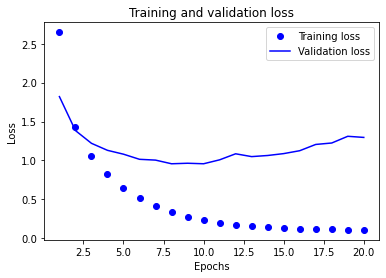

In [33]:
#훈련과 검증 손실 그리기
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

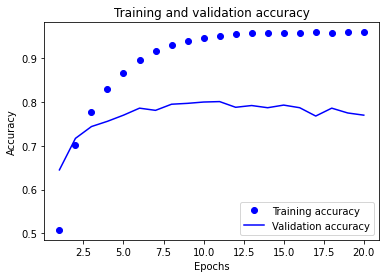

In [34]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 모델을 처음부터 다시 훈련하기

In [35]:
#모델 정의하기
model = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=46, activation='softmax'),
])

In [36]:
#모델 컴파일하기
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

In [37]:
model.fit(x_train, y_train, epochs=9, batch_size=512)
model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 21ms/step - loss: 2.5311 - accuracy: 0.5283
Epoch 2/9
18/18 [==============================] - 0s 22ms/step - loss: 1.3552 - accuracy: 0.7164
Epoch 3/9
18/18 [==============================] - 0s 23ms/step - loss: 1.0064 - accuracy: 0.7831
Epoch 4/9
18/18 [==============================] - 0s 20ms/step - loss: 0.7855 - accuracy: 0.8334
Epoch 5/9
18/18 [==============================] - 0s 20ms/step - loss: 0.6243 - accuracy: 0.8696
Epoch 6/9
18/18 [==============================] - 0s 21ms/step - loss: 0.4935 - accuracy: 0.8980
Epoch 7/9
18/18 [==============================] - 0s 20ms/step - loss: 0.4027 - accuracy: 0.9144
Epoch 8/9
18/18 [==============================] - 0s 20ms/step - loss: 0.3250 - accuracy: 0.9321
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9508 - accuracy: 0.8001


[0.9507651329040527, 0.8000890612602234]

이 모델은 80% 에 가까운 정확도를 달성한다<br>
균형 잡힌 이진 분류 문제에서 완전히 무작위로 분류하면 50% 의 정확도를 달성한다<br>
하지만 이 문제는 46개의 클래스가 있고, 각각의 클래스 비율이 같지 않다<br>

랜덤한 분류기를 사용해서 예측하면 정확도는?

#### 랜덤한 분류기를 사용해서 예측

In [38]:
import copy

In [39]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18744434550311664

랜덤한 분류기는 약 19%의 분류 정확도를 달성한다

### ⑤ 새로운 데이터 예측
새로운 샘플로 모델의 predict 메서드를 호출하면, 각 샘플에 대해 46개의 토픽에 대한 클래스 확률 분포를 반환한다

In [40]:
#훈련된 모델로 새로운 데이터 예측
preds = model.predict(x_test)
preds

71/71 [==============================] - 0s 2ms/step


array([[5.45079783e-05, 1.79023991e-04, 2.04864518e-05, ...,
        7.35412914e-06, 4.05709907e-05, 4.70958321e-06],
       [2.14101019e-04, 1.76013242e-02, 6.94342889e-03, ...,
        1.81754061e-04, 3.06776968e-07, 2.12726198e-04],
       [8.22891947e-04, 9.24226105e-01, 1.08374085e-03, ...,
        3.41698789e-04, 3.42686435e-05, 6.28529742e-05],
       ...,
       [2.16172812e-05, 1.16466283e-04, 1.12869475e-05, ...,
        7.80023947e-06, 5.11277867e-05, 4.78137372e-06],
       [2.04451289e-03, 1.77934412e-02, 2.72445660e-03, ...,
        2.03469972e-04, 6.97637093e-04, 6.88338652e-04],
       [7.19477539e-04, 2.79103488e-01, 4.96457284e-03, ...,
        3.49029433e-03, 6.32744865e-04, 5.19913970e-04]], dtype=float32)

In [42]:
preds[0].shape

(46,)

In [43]:
np.sum(preds[0])

1.0000001

In [45]:
#가장 확률이 높은 클래스
np.argmax(preds[0])

3

#### * 레이블과 손실을 다루는 다른 방법
레이블을 인코딩하는 다른 방법은 '정수 텐서로 변환하는 것' 이다<br>
정수 레이블을 사용할 때는 손실 함수로 'sparse_categorical_crossentropy' 를 사용한다<br>
('categorical_crossentropy' 는 레이블이 범주형 인코딩 되어 있을 것이라 기대한다)

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

손실 함수 'sparse_categorical_crossentropy' 는 인터페이스만 다를 뿐이고, 수학적으로는 'categorical_crossentropy' 와 동일하다

#### * 충분히 큰 중간층을 두어야하는 이유
이 예제는 마지막 출력이 '46차원' 이었으므로, 중간층의 중간 유닛이 46개보다 적어서는 안된다<br>
만약 46개 보다 훨씬 작은 중간층을 두면 정보의 병목이 나타난다

In [46]:
model = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=46, activation='softmax'),
])

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

model.fit(partial_x_train, partial_y_train,
          epochs=20, batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 14ms/step - loss: 3.2776 - accuracy: 0.0896 - val_loss: 2.7814 - val_accuracy: 0.1510
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.0828 - accuracy: 0.5331 - val_loss: 1.7198 - val_accuracy: 0.6490
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4074 - accuracy: 0.6812 - val_loss: 1.5220 - val_accuracy: 0.6510
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.2450 - accuracy: 0.6994 - val_loss: 1.4765 - val_accuracy: 0.6660
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1498 - accuracy: 0.7112 - val_loss: 1.4693 - val_accuracy: 0.6720
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0747 - accuracy: 0.7194 - val_loss: 1.5060 - val_accuracy: 0.6710
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0147 - accuracy: 0.7228 - val_loss: 1.4783 - val_accuracy: 0.6690
Epoch 8/20
63

### ⑥ 추가 실험

#### Dense 층의 개수 변화

* 중간층 3개

In [52]:
model = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=46, activation='softmax'),
])

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 2.6893 - accuracy: 0.5010 - val_loss: 1.8254 - val_accuracy: 0.5940
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 1.4388 - accuracy: 0.6897 - val_loss: 1.4091 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.1093 - accuracy: 0.7498 - val_loss: 1.2598 - val_accuracy: 0.7300
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8830 - accuracy: 0.8062 - val_loss: 1.2184 - val_accuracy: 0.7390
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.7206 - accuracy: 0.8358 - val_loss: 1.1252 - val_accuracy: 0.7590
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5880 - accuracy: 0.8661 - val_loss: 1.0843 - val_accuracy: 0.7730
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.4757 - accuracy: 0.8965 - val_loss: 1.0765 - val_accuracy: 0.7850
Epoch 8/20
16

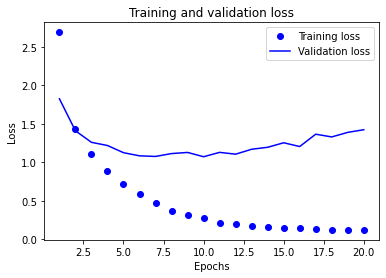

In [53]:
#훈련과 검증 손실 그리기
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

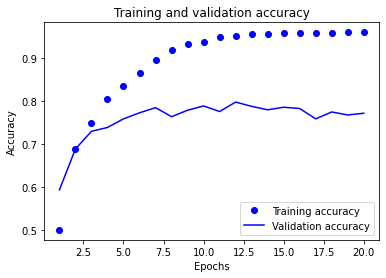

In [54]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* 중간층 1개

In [55]:
model = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=46, activation='softmax'),
])

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.5879 - accuracy: 0.5783 - val_loss: 1.8943 - val_accuracy: 0.6920
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.4483 - accuracy: 0.7352 - val_loss: 1.4426 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0429 - accuracy: 0.8007 - val_loss: 1.2244 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8116 - accuracy: 0.8421 - val_loss: 1.1003 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6508 - accuracy: 0.8708 - val_loss: 1.0387 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5297 - accuracy: 0.8985 - val_loss: 0.9893 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.4372 - accuracy: 0.9137 - val_loss: 0.9578 - val_accuracy: 0.8030
Epoch 8/20
16

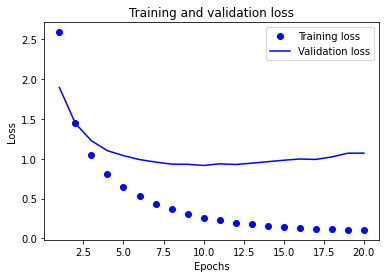

In [56]:
#훈련과 검증 손실 그리기
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

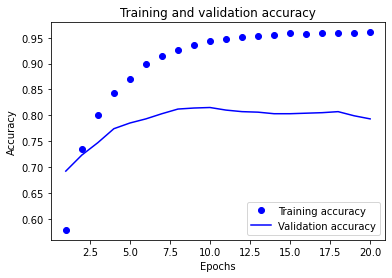

In [57]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 층의 유닛수 변화

* 유닛수 32개

In [58]:
model = Sequential([
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=46, activation='softmax'),
])

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 3.1717 - accuracy: 0.3428 - val_loss: 2.5130 - val_accuracy: 0.6660
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 2.0325 - accuracy: 0.6789 - val_loss: 1.8182 - val_accuracy: 0.6910
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4585 - accuracy: 0.7202 - val_loss: 1.4954 - val_accuracy: 0.7130
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1672 - accuracy: 0.7583 - val_loss: 1.3228 - val_accuracy: 0.7270
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9826 - accuracy: 0.7905 - val_loss: 1.2307 - val_accuracy: 0.7360
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8435 - accuracy: 0.8173 - val_loss: 1.1609 - val_accuracy: 0.7480
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7293 - accuracy: 0.8441 - val_loss: 1.1092 - val_accuracy: 0.7590
Epoch 8/20
16

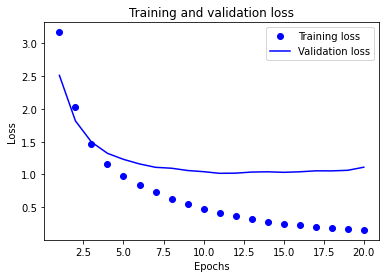

In [59]:
#훈련과 검증 손실 그리기
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

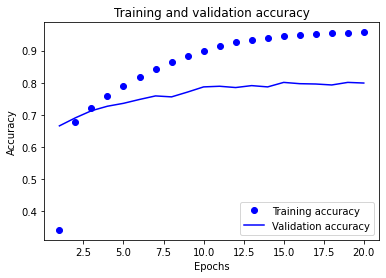

In [60]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* 유닛수 128개

In [61]:
model = Sequential([
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=46, activation='softmax'),
])

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 2.2068 - accuracy: 0.5685 - val_loss: 1.4382 - val_accuracy: 0.6970
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.0863 - accuracy: 0.7694 - val_loss: 1.1737 - val_accuracy: 0.7460
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7620 - accuracy: 0.8348 - val_loss: 1.0719 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5390 - accuracy: 0.8852 - val_loss: 0.9881 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4028 - accuracy: 0.9183 - val_loss: 0.9966 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 0.3018 - accuracy: 0.9352 - val_loss: 0.9764 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.2405 - accuracy: 0.9449 - val_loss: 0.9779 - val_accuracy: 0.7980
Epoch 8/20
16

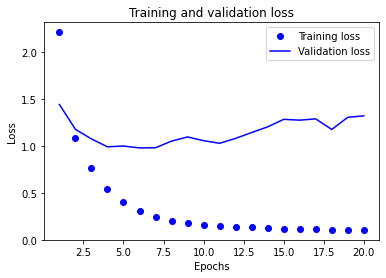

In [62]:
#훈련과 검증 손실 그리기
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")    #"bo" : '파란색 점' 을 의미
plt.plot(epochs, val_loss, "b", label="Validation loss")    #"b" : '파란색 실선' 을 의미
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

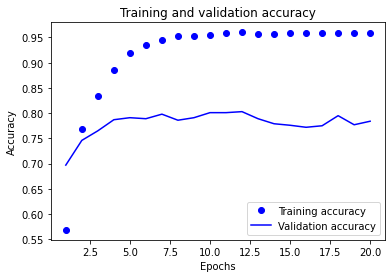

In [63]:
#훈련과 검증 정확도 그리기

#그래프 초기화
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 221123

#### * 용어정리
#클래스와 레이블<br>
머신 러닝에서 분류 문제의 범주(category) 를 '클래스(class)' 라고 한다<br>
데이터 포인트는 샘플(sample) 이라고 하며, 특정 샘플의 클래스를 레이블(label) 이라고 한다<br>

#손실함수 (또는 목적함수) : 훈련 과정에서 최소화할 값, 현재 작업에 대한 성공의 척도<br>
#손실함수의 종류 : categorical_crossentropy, sparse_categorical_crossentropy, ...<br>

#옵티마이저 : 손실함수를 기반으로 네트워크가 어떻게 업데이트될지 설정<br>
#옵티마이저의 종류 : SGD / RMSprop / Adam / Adagrad ...<br>

#배열의 최대값을 갖는 인덱스를 알려면 : np.argmax()<br>
#변환해야할 데이터 타입 : float64 --> float32<br>

#과적합 : 모델이 훈련 데이터에만 적합하게 설정되어 있는 것(?)<br>

#텐서(tensor) : 다차원 배열<br>

#변환의 종류 --> 이동, 확대, 축소, 아핀변환, ...<br>

#컬러 사진 100장을 (100, 28, 28, 3) 으로 표기할 때 (samples, , , ) :<br>
(samples, height(행), width(열), channels)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
a.shape

(12,)

In [4]:
#3행 4열의 2차원으로 변경
a.reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
a = a.reshape(3, 4)
a.shape

(3, 4)

In [6]:
#a.shape를 (3, 4, 1) 로 변경
a.reshape((3, 4, 1))

array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]])

In [7]:
a[:, :, np.newaxis].shape

(3, 4, 1)

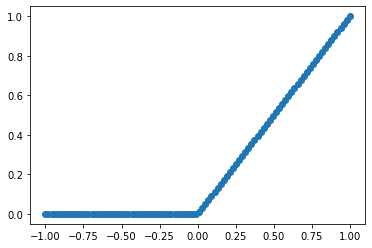

In [9]:
#relu 함수 그래프
x = np.linspace(-1, 1, 100)
plt.scatter(x, np.maximum(0, x))

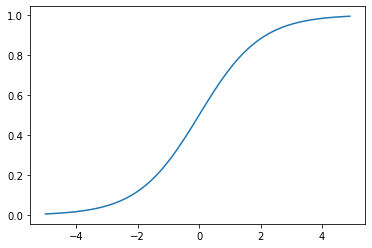

In [10]:
#시그모이드 함수 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.show()

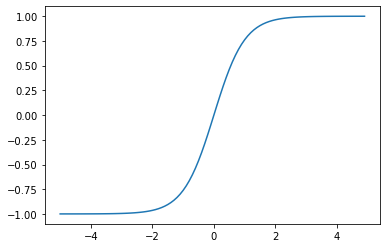

In [11]:
#tanh 의 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = ( np.exp(x) - np.exp(-x) ) / ( np.exp(x) + np.exp(-x) )

plt.plot(x, y)
plt.show()

## 2-4. 그레디언트 기반 최적화

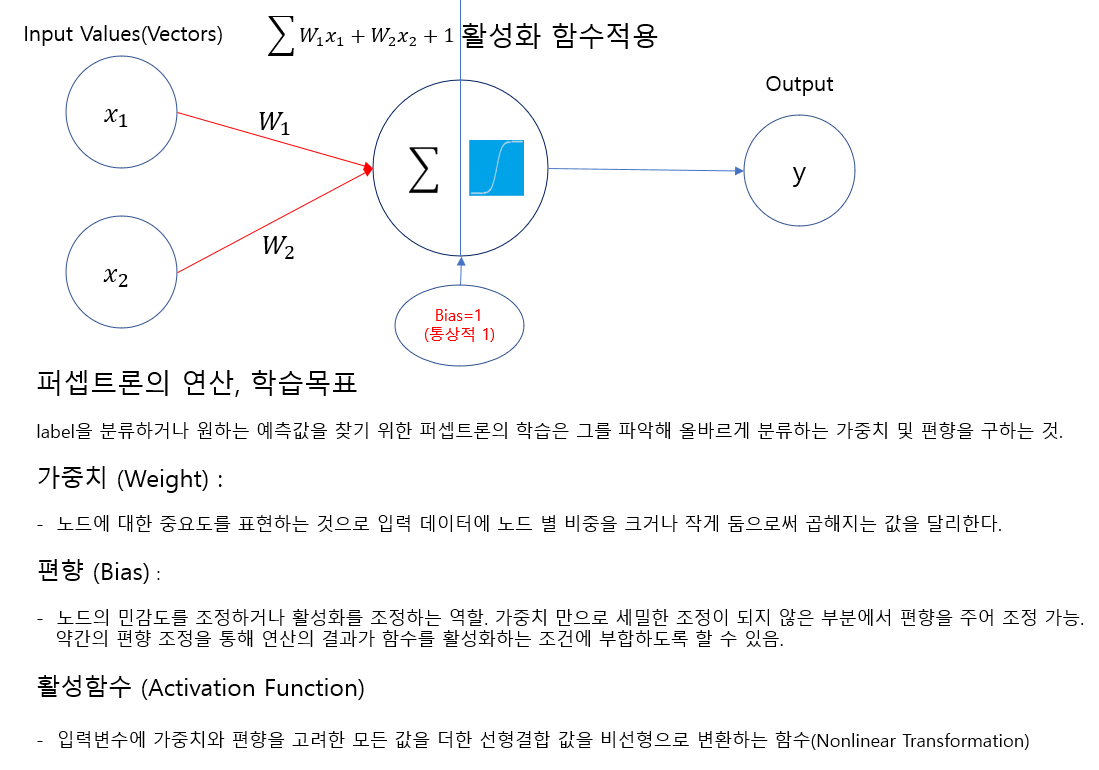

### output = relu(dot(W, input) + b)
relu : 활성화 함수<br>
W : 가중치 (weight)<br>
b : 편향 (bias)

딥러닝에서 각 층(Dense)은 입력 데이터를 위의 식과 같이 변환한다<br>

초기에는 가중치 행렬이 작은 난수(임의의 수) 로 채워져 있다 (무작위 초기화 단계)<br>
W와 b가 난수일 때의 output 은 의미 없는 값이며, 이후에 피드백 신호에 기초하여 가중치가 점진적으로 조정된다<br>
(머신러닝의 핵심 : "점진적인 조정 또는 훈련" , 훈련 = fit = learn(학습) )

훈련은 '훈련 반복 루프' 안에서 일어나며 (epoch), 손실이 충분히 낮아질 때까지 반복된다<br>

① 훈련 샘플 x와, 이에 상응하는 타깃 y-true 생성<br>
② x (input) 를 사용하여 모델 실행, 예측 y-pred (output) 추출<br>
③ y-pred 와 y-true 의 '차이' 를 측정하여 모델의 '손실' 계산<br>
④ 손실이 감소되도록 가중치(W) 업데이트

가중치를 증가시켜야할지, 감소시켜야할지, 얼만큼 업데이트해야할지 어떻게 알 수 있을까<br>

* 가중치 초기화 : https://yngie-c.github.io/deep%20learning/2020/03/17/parameter_init/

#### 경사하강법
모델에 사용되는 모든 함수는 입력값(x) 을 연속적인 방식으로 변환(y) 한다<br>
(즉 모델에 사용되는 모든 함수는 '연속적' 이다)<br>

예) z = x + y<br>
y 를 조금 변경하면 z 값도 조금 변경된다<br>
즉 y 의 변경 방향을 알고있다면 z 의 변경 방향을 추측할 수 있는 것이다 --> "미분가능"<br>

모델의 가중치를 조금 변경하면 --> 손실 값이 예측 가능한 방향으로 조금 바뀐다<br>
여기에 '그레디언트(gradient)' 를 사용하여 가중치를 여러 방향으로 이동했을 때 손실이 얼마나 변하는지 파악하고,<br>
최종적으로 '손실이 감소하는 방향으로' 가중치를 이동시킬 수 있다

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import keras
from keras import Sequential
from keras import optimizers
from keras.layers import Input, Dense

In [14]:
x = np.linspace(-1, 1, 100)    #균등분할

In [15]:
seq = Sequential([
    Dense(units=10, activation='tanh', input_dim=1),
    Dense(units=10, activation='tanh'),
    Dense(units=1)
])

seq.compile(optimizer = 'SGD', loss = 'mse', metrics = 'mse')

In [16]:
seq.fit(x[:70], (x[:70])**2, epochs=1000, verbose=0, batch_size=16)
seq.predict(x[70:])

1/1 [==============================] - 0s 83ms/step


* 0.555의 y값 예측

In [17]:
#0.555의 y값 예측
seq.predict(0.555)

IndexError: tuple index out of range

In [18]:
a = np.array(0.555)
seq.predict(a)

IndexError: tuple index out of range

In [19]:
#seq.predict([0.555])
seq.predict(np.array([0.005]))

1/1 [==============================] - 0s 18ms/step


array([[0.04207548]], dtype=float32)

### * 예측(1) - x : 1개, y : 2개

In [20]:
x = np.linspace(-1, 1, 100)
np.random.shuffle(x)

In [21]:
y1 = x**2 + 3*x + 1
y2 = x*2 + 3

In [22]:
y1.shape

(100,)

In [23]:
y1 = y1.reshape(100, 1)
y2 = y2.reshape(100, 1)

In [25]:
y2

array([[1.88888889],
       [2.21212121],
       [1.12121212],
       [2.93939394],
       [3.50505051],
       [3.82828283],
       [4.83838384],
       [1.96969697],
       [4.5959596 ],
       [4.19191919],
       [3.78787879],
       [4.35353535],
       [3.54545455],
       [3.22222222],
       [2.8989899 ],
       [3.86868687],
       [2.05050505],
       [1.56565657],
       [1.76767677],
       [1.04040404],
       [1.        ],
       [2.97979798],
       [3.94949495],
       [4.51515152],
       [4.47474747],
       [4.63636364],
       [4.75757576],
       [1.36363636],
       [2.13131313],
       [1.92929293],
       [4.15151515],
       [4.67676768],
       [3.34343434],
       [1.08080808],
       [2.85858586],
       [4.7979798 ],
       [3.66666667],
       [2.81818182],
       [1.28282828],
       [2.77777778],
       [4.03030303],
       [3.62626263],
       [1.64646465],
       [2.29292929],
       [3.14141414],
       [1.2020202 ],
       [2.37373737],
       [3.303

In [26]:
np.concatenate( (y1, y2), axis=1 )

array([[-0.35802469,  1.88888889],
       [-0.02662994,  2.21212121],
       [-0.93572084,  1.12121212],
       [ 0.91000918,  2.93939394],
       [ 1.82134476,  3.50505051],
       [ 2.41393735,  3.82828283],
       [ 4.60248954,  4.83838384],
       [-0.28007346,  1.96969697],
       [ 4.03071115,  4.5959596 ],
       [ 3.14304663,  4.19191919],
       [ 2.33700643,  3.78787879],
       [ 3.48831752,  4.35353535],
       [ 1.89256198,  3.54545455],
       [ 1.34567901,  3.22222222],
       [ 0.85103561,  2.8989899 ],
       [ 2.49168452,  3.86868687],
       [-0.19885726,  2.05050505],
       [-0.63717988,  1.56565657],
       [-0.46882971,  1.76767677],
       [-0.97938986,  1.04040404],
       [-1.        ,  1.        ],
       [ 0.969799  ,  2.97979798],
       [ 2.64962759,  3.94949495],
       [ 3.8466483 ,  4.51515152],
       [ 3.75584124,  4.47474747],
       [ 4.12396694,  4.63636364],
       [ 4.40863177,  4.75757576],
       [-0.78512397,  1.36363636],
       [-0.11437608,

* 다른 방법

In [27]:
y = np.zeros(shape = (100, 2))
y[:3]

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [28]:
y[:, 0] = x**2 + 3*x + 1    #0번째 열에 y1 대입
y[:, 1] = x*2 + 3           #1번째 열에 y2 대입
y[:3]

array([[-0.35802469,  1.88888889],
       [-0.02662994,  2.21212121],
       [-0.93572084,  1.12121212]])

In [29]:
#최소 코드
seq = Sequential()

seq.add(Input(1))   # x 1개 입력 (input)
seq.add(Dense(units=10, activation='tanh'))   #dense(밀집) 레이어1 / units : 뉴런의 수
seq.add(Dense(units=10, activation='tanh'))   #dense(밀집) 레이어2
seq.add(Dense(units=2))   # y 2개 출력 (output)

seq.compile(optimizer = 'SGD', loss = 'mse', metrics = 'mse')

n = 80    #훈련 데이터 80개
seq.fit(x[:n], y[:n], epochs=100, verbose=0, batch_size=32)

preds = seq.predict(x[n:])

1/1 [==============================] - 0s 57ms/step


In [31]:
preds[:5]

array([[ 2.1567364 ,  3.6482828 ],
       [-0.7437345 ,  1.6003666 ],
       [ 0.9062474 ,  2.8784878 ],
       [ 2.998852  ,  4.0908093 ],
       [ 0.62289464,  2.6833827 ]], dtype=float32)

In [32]:
y[80:85]

array([[ 1.75094378,  3.46464646],
       [-0.53861851,  1.68686869],
       [ 0.62330374,  2.73737374],
       [ 2.89266401,  4.07070707],
       [ 0.40863177,  2.57575758]])

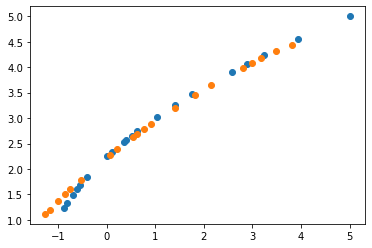

In [33]:
#실제값과 예측값 비교
plt.scatter(y[80:, 0], y[80:, 1])
plt.scatter(preds[:, 0], preds[:, 1])

### * 예측(2) - x : 2개 , y : 1개

In [41]:
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
np.random.shuffle(x1)
np.random.shuffle(x2)

In [42]:
x1

array([ 0.7979798 ,  0.19191919, -0.37373737,  0.73737374,  0.49494949,
       -0.21212121, -0.45454545, -0.01010101, -0.67676768, -0.53535354,
       -0.97979798, -0.93939394, -0.39393939,  0.37373737, -0.57575758,
       -0.13131313,  0.27272727, -0.55555556, -0.23232323, -0.33333333,
       -0.07070707,  0.83838384,  0.87878788,  0.63636364, -1.        ,
       -0.51515152, -0.35353535, -0.85858586,  0.01010101,  0.61616162,
       -0.71717172,  0.81818182, -0.8989899 , -0.47474747, -0.6969697 ,
        0.53535354, -0.19191919,  0.95959596, -0.43434343, -0.5959596 ,
        0.65656566,  0.17171717, -0.95959596, -0.29292929,  0.71717172,
       -0.25252525, -0.75757576,  0.47474747, -0.09090909, -0.27272727,
       -0.31313131,  0.91919192,  0.29292929,  0.77777778,  0.67676768,
        0.93939394, -0.63636364, -0.61616162, -0.03030303,  0.97979798,
        0.13131313,  0.6969697 , -0.41414141, -0.15151515,  0.31313131,
        0.25252525,  0.23232323, -0.49494949, -0.17171717,  0.43

In [43]:
x2

array([ 0.47474747,  0.49494949, -0.71717172,  0.45454545,  0.85858586,
        0.73737374, -0.37373737, -0.05050505, -0.35353535, -0.27272727,
       -0.19191919,  0.81818182,  0.83838384, -0.29292929, -0.63636364,
       -0.11111111, -0.47474747, -0.13131313, -0.83838384,  0.11111111,
       -0.41414141,  0.23232323, -0.87878788, -0.85858586, -0.39393939,
       -0.45454545, -0.49494949,  0.7979798 ,  0.8989899 , -0.15151515,
        0.53535354, -0.53535354, -0.33333333, -0.6969697 ,  0.61616162,
       -0.51515152, -0.17171717, -0.77777778,  0.31313131, -0.57575758,
        0.03030303, -0.01010101,  0.33333333, -0.43434343,  0.39393939,
        0.63636364,  0.5959596 , -0.09090909, -0.07070707,  0.93939394,
        0.21212121,  0.29292929, -0.03030303,  0.17171717,  0.57575758,
        0.35353535,  0.6969697 ,  0.13131313,  0.65656566,  0.09090909,
        0.55555556, -0.25252525,  0.67676768, -0.75757576, -0.95959596,
       -0.91919192,  0.41414141,  0.25252525,  0.37373737, -0.79

In [44]:
y = x1 + x2
y

array([ 1.27272727e+00,  6.86868687e-01, -1.09090909e+00,  1.19191919e+00,
        1.35353535e+00,  5.25252525e-01, -8.28282828e-01, -6.06060606e-02,
       -1.03030303e+00, -8.08080808e-01, -1.17171717e+00, -1.21212121e-01,
        4.44444444e-01,  8.08080808e-02, -1.21212121e+00, -2.42424242e-01,
       -2.02020202e-01, -6.86868687e-01, -1.07070707e+00, -2.22222222e-01,
       -4.84848485e-01,  1.07070707e+00,  1.11022302e-16, -2.22222222e-01,
       -1.39393939e+00, -9.69696970e-01, -8.48484848e-01, -6.06060606e-02,
        9.09090909e-01,  4.64646465e-01, -1.81818182e-01,  2.82828283e-01,
       -1.23232323e+00, -1.17171717e+00, -8.08080808e-02,  2.02020202e-02,
       -3.63636364e-01,  1.81818182e-01, -1.21212121e-01, -1.17171717e+00,
        6.86868687e-01,  1.61616162e-01, -6.26262626e-01, -7.27272727e-01,
        1.11111111e+00,  3.83838384e-01, -1.61616162e-01,  3.83838384e-01,
       -1.61616162e-01,  6.66666667e-01, -1.01010101e-01,  1.21212121e+00,
        2.62626263e-01,  

In [45]:
x1.shape

(100,)

In [46]:
x1 = x1[: , np.newaxis]
x1[:5]

array([[ 0.7979798 ],
       [ 0.19191919],
       [-0.37373737],
       [ 0.73737374],
       [ 0.49494949]])

In [47]:
x2 = x2[: , np.newaxis]
x2[:5]

array([[ 0.47474747],
       [ 0.49494949],
       [-0.71717172],
       [ 0.45454545],
       [ 0.85858586]])

In [48]:
x = np.concatenate( (x1, x2), axis = 1 )
x

array([[ 0.7979798 ,  0.47474747],
       [ 0.19191919,  0.49494949],
       [-0.37373737, -0.71717172],
       [ 0.73737374,  0.45454545],
       [ 0.49494949,  0.85858586],
       [-0.21212121,  0.73737374],
       [-0.45454545, -0.37373737],
       [-0.01010101, -0.05050505],
       [-0.67676768, -0.35353535],
       [-0.53535354, -0.27272727],
       [-0.97979798, -0.19191919],
       [-0.93939394,  0.81818182],
       [-0.39393939,  0.83838384],
       [ 0.37373737, -0.29292929],
       [-0.57575758, -0.63636364],
       [-0.13131313, -0.11111111],
       [ 0.27272727, -0.47474747],
       [-0.55555556, -0.13131313],
       [-0.23232323, -0.83838384],
       [-0.33333333,  0.11111111],
       [-0.07070707, -0.41414141],
       [ 0.83838384,  0.23232323],
       [ 0.87878788, -0.87878788],
       [ 0.63636364, -0.85858586],
       [-1.        , -0.39393939],
       [-0.51515152, -0.45454545],
       [-0.35353535, -0.49494949],
       [-0.85858586,  0.7979798 ],
       [ 0.01010101,

In [49]:
#최소 코드
seq = Sequential()

seq.add(Input(2))   # x 2개
seq.add(Dense(units=10, activation='tanh'))
seq.add(Dense(units=10, activation='tanh'))
seq.add(Dense(units=1))   # y 1개

seq.compile(optimizer = 'SGD', loss = 'mse', metrics = 'mse')

n = 80
seq.fit(x[:n], y[:n], epochs=100, verbose=0, batch_size=32)

preds_2 = seq.predict(x[n:])

1/1 [==============================] - 0s 51ms/step


In [50]:
preds_2[:5]

array([[-0.16595142],
       [-0.4428723 ],
       [-0.19480519],
       [ 1.4231367 ],
       [-1.3615143 ]], dtype=float32)

In [51]:
y[80:85]

array([-0.16161616, -0.4040404 , -0.18181818,  1.53535354, -1.43434343])

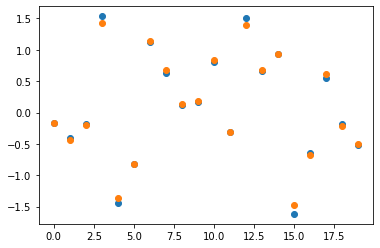

In [53]:
plt.scatter(range(20), y[80:])
plt.scatter(range(20), preds_2)

### * 예측(3) - x : 2개, y : 2개

In [75]:
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
np.random.shuffle(x1)
np.random.shuffle(x2)

In [76]:
x1 = x1[: , np.newaxis]
x2 = x2[: , np.newaxis]

In [90]:
print(x1.shape)
print(x2.shape)

(100, 1)
(100, 1)


In [77]:
x = np.concatenate( (x1, x2), axis = 1 )
x

array([[-0.6969697 ,  0.41414141],
       [ 0.6969697 ,  0.61616162],
       [-0.31313131,  0.8989899 ],
       [-0.21212121, -0.17171717],
       [ 0.67676768,  0.81818182],
       [ 0.5959596 , -0.39393939],
       [ 0.39393939, -0.91919192],
       [ 0.83838384,  0.91919192],
       [ 0.77777778, -0.23232323],
       [ 0.75757576, -0.49494949],
       [-0.95959596,  0.35353535],
       [-0.03030303, -0.73737374],
       [ 0.87878788, -0.11111111],
       [-0.39393939, -0.81818182],
       [-0.91919192, -0.41414141],
       [-0.27272727, -0.51515152],
       [-0.97979798,  0.43434343],
       [ 0.55555556,  0.5959596 ],
       [ 0.17171717, -0.67676768],
       [-0.19191919, -0.33333333],
       [ 0.71717172, -0.05050505],
       [ 0.33333333,  0.65656566],
       [-0.93939394,  0.97979798],
       [-0.87878788,  1.        ],
       [ 0.57575758,  0.51515152],
       [-0.67676768, -0.93939394],
       [ 0.81818182,  0.57575758],
       [-0.05050505,  0.29292929],
       [ 0.25252525,

In [84]:
x.shape

(100, 2)

In [93]:
y1 = x1**2 + 3*x2 + 1
y2 = x1 + x2

In [94]:
y1.shape

(100, 1)

In [95]:
y = np.concatenate( (y1, y2), axis=1 )
y

array([[ 2.728191  , -0.28282828],
       [ 3.33425161,  1.31313131],
       [ 3.79502092,  0.58585859],
       [ 0.52984389, -0.38383838],
       [ 3.91255994,  1.49494949],
       [ 0.17334966,  0.2020202 ],
       [-1.60238751, -0.52525253],
       [ 4.46046322,  1.75757576],
       [ 0.90796857,  0.54545455],
       [ 0.08907254,  0.26262626],
       [ 2.98143047, -0.60606061],
       [-1.21120294, -0.76767677],
       [ 1.4389348 ,  0.76767677],
       [-1.29935721, -1.21212121],
       [ 0.60248954, -1.33333333],
       [-0.47107438, -0.78787879],
       [ 3.26303438, -0.54545455],
       [ 3.09652076,  1.15151515],
       [-1.00081624, -0.50505051],
       [ 0.03683298, -0.52525253],
       [ 1.36282012,  0.66666667],
       [ 3.08080808,  0.98989899],
       [ 4.82185491,  0.04040404],
       [ 4.77226814,  0.12121212],
       [ 2.87695133,  1.09090909],
       [-1.36016733, -1.61616162],
       [ 3.39669421,  1.39393939],
       [ 1.88133864,  0.24242424],
       [ 3.57892052,

In [96]:
y.shape

(100, 2)

In [97]:
#최소 코드
seq = Sequential()

seq.add(Input(2))   # x 2개
seq.add(Dense(units=10, activation='tanh'))
seq.add(Dense(units=10, activation='tanh'))
seq.add(Dense(units=2))   # y 2개

seq.compile(optimizer = 'SGD', loss = 'mse', metrics = 'mse')

n = 80
seq.fit(x[:n], y[:n], epochs=100, verbose=0, batch_size=32)

preds_3 = seq.predict(x[n:])

1/1 [==============================] - 0s 57ms/step


In [98]:
preds_3[:5]

array([[ 3.5204031 ,  0.37876332],
       [ 1.6725096 , -0.18526542],
       [ 1.0560529 , -0.2430879 ],
       [ 0.19643785, -0.11964062],
       [-0.7936723 , -0.35812986]], dtype=float32)

In [99]:
y[80:85]

array([[ 3.23058872,  0.32323232],
       [ 1.14488318, -0.2020202 ],
       [ 0.61432507, -0.22222222],
       [ 0.0137741 , -0.08080808],
       [-0.78410366, -0.28282828]])

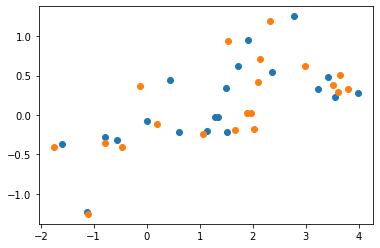

In [106]:
#plt.scatter(range(20, 2), y[80:])
#plt.scatter(range(20, 2), preds_3)

plt.scatter(y[80:, 0], y[80:, 1])
plt.scatter(preds_3[:, 0], preds_3[:, 1])

## 4-3. 주택 가격 예측 : 회귀 문제 (p.170 ~ 178)
회귀 : 연속적인 값을 예측<br>

회귀에서 사용하는 손실함수와 평가지표는 분류와 다르다<br>
손실함수 : MSE (평균 제곱 오차) , 평가지표 : MAE (평균 절대 오차)

### ① 보스턴 주택 가격 데이터셋
주택 가격의 '중간값' 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras import Sequential
from keras import optimizers
from keras.layers import Input, Dense

In [3]:
from keras.datasets import boston_housing

In [4]:
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [9]:
train_x[0]    #값의 스케일이 천차만별이다

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
train_x.shape

(404, 13)

In [7]:
test_x.shape    #train 과 test 세트 모두 13개의 특성 존재

(102, 13)

In [8]:
#train_y : 주택의 중간 가격
print(train_y.shape)
train_y[:5]

(404,)


array([15.2, 42.3, 50. , 21.1, 17.7])

### ② 데이터 준비
서로 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다<br>
모델이 다양한 데이터에 자동으로 맞추려고 할 수는 있지만, 이는 학습을 더 어렵게 한다<br>

따라서 이러한 데이터를 다룰 때 대표적인 방법은 특성별로(칼럼별로) '정규화 또는 표준화' 를 하는 것이다<br>
입력 데이터에 있는 각 칼럼에 대해 각 칼럼의 '평균값' 을 빼고, '표준편차' 로 나눈다

In [9]:
train_x[0]    #값의 스케일이 천차만별이다

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [10]:
train_x.mean()          #전체 데이터에 대한 평균값
train_x.mean(axis=0)    #각 칼럼(axis=0) 에 대한 평균값

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [11]:
### 데이터 표준화 : 평균을 빼고 표준편차로 나눈다

mean = train_x.mean(axis=0)    #각 칼럼별 평균값
std  = train_x.std(axis=0)     #각 칼럼별 표준편차

train_x = (train_x - mean) / std
train_x[:3]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006]])

In [12]:
#테스트 데이터도 표준화
test_x = (test_x - mean) / std

***** 중요 *****<br>
테스트 데이터 세트를 정규화/표준화 할 때는 '훈련 데이터에서 계산한 값' 을 사용한다<br>
테스트 데이터를 가지고는 절대 어떠한 계산도 하지 않는다<br>

### ③ 모델 구성

In [13]:
#모델 정의하기
model = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)   #활성화 함수 없음 --> '선형 층'
])

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = 'mae')

이 모델의 마지막 층은 활성화 함수가 없다 --> '선형 층'<br>
이것이 전형적인 '스칼라 회귀 (하나의 연속적인 값을 예측하는 회귀)' 구성이다<br>

활성화 함수를 적용하면 출력 값의 범위를 제한하게 되는데, 이 모델과 같이 마지막 층이<br>
'선형' 인 경우 모델이 어떤 범위의 값이라도 예측할 수 있도록 자유롭게 학습이 이루어진다

In [14]:
#모델 학습
history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=16)

In [15]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [16]:
history.history['mae']

[20.61162567138672,
 16.20462989807129,
 11.16905689239502,
 7.3516411781311035,
 5.419464588165283,
 4.289669513702393,
 3.634903907775879,
 3.208095073699951,
 3.0257203578948975,
 2.866852045059204,
 2.766125440597534,
 2.6871235370635986,
 2.5525095462799072,
 2.4809510707855225,
 2.4251091480255127,
 2.359220504760742,
 2.354217052459717,
 2.3474628925323486,
 2.2373504638671875,
 2.261913537979126,
 2.2086048126220703,
 2.1983892917633057,
 2.1697072982788086,
 2.1206531524658203,
 2.136570692062378,
 2.1457252502441406,
 2.101933479309082,
 2.0959479808807373,
 2.0624945163726807,
 2.0663671493530273,
 2.076892614364624,
 2.0548830032348633,
 2.0300822257995605,
 2.025487184524536,
 1.9940593242645264,
 1.9845749139785767,
 1.9862632751464844,
 1.9691402912139893,
 1.9559508562088013,
 1.9334847927093506,
 1.9536951780319214,
 1.9150562286376953,
 1.907693862915039,
 1.9137392044067383,
 1.9438774585723877,
 1.866196632385254,
 1.8692582845687866,
 1.8955150842666626,
 1.8702812

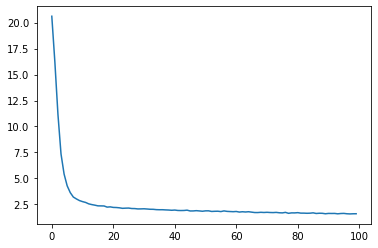

In [17]:
plt.plot(history.history['mae'])

In [18]:
#주택 중간 가격 예측
model.predict(test_x)

4/4 [==============================] - 0s 1ms/step


array([[ 7.6523833],
       [18.550716 ],
       [21.519974 ],
       [32.47515  ],
       [24.09653  ],
       [21.77008  ],
       [25.350521 ],
       [20.61121  ],
       [18.501043 ],
       [21.140537 ],
       [21.136505 ],
       [15.708903 ],
       [15.589535 ],
       [40.6009   ],
       [20.162334 ],
       [19.24163  ],
       [23.834648 ],
       [18.150719 ],
       [18.633362 ],
       [25.305605 ],
       [11.638906 ],
       [13.722051 ],
       [20.62902  ],
       [17.286541 ],
       [19.487015 ],
       [23.113281 ],
       [28.031689 ],
       [28.953987 ],
       [11.256284 ],
       [18.903543 ],
       [19.894657 ],
       [13.99689  ],
       [31.994621 ],
       [22.16556  ],
       [17.970894 ],
       [ 6.9169893],
       [16.833359 ],
       [17.451065 ],
       [18.129272 ],
       [24.860987 ],
       [29.653828 ],
       [26.311531 ],
       [12.6385   ],
       [42.286484 ],
       [28.256172 ],
       [24.355415 ],
       [25.63853  ],
       [17.53

In [19]:
#실제값과 예측값 비교
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 2ms/step - loss: 16.8778 - mae: 2.6107


[16.877771377563477, 2.6106717586517334]

### ④ K-Fold 검증을 사용한 훈련 검증
K-Fold Cross-Validation K-Fold 교차 검증<br>
우리 눈에는 같은 데이터를 가지고 교차 검증하는 것이지만,<br>
컴퓨터에서는 k-fold 된 데이터들이 매번 새로운 데이터처럼 인식된다<br>

데이터의 양이 '적다' 면 'K-Fold 검증' 을 사용하는 것이 신뢰할 수 있는 모델 평가 방법이며,<br>
또한 훈련 데이터가 '적다' 면 과대적합을 피하기 위해 '중간층의 수를 줄인 (일반적으로 1개 또는 2개)' 작은 모델을 사용하는 것이 좋다 

In [20]:
def build_model():
    model = Sequential([
        Dense(units=64, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=1)   #활성화 함수 없음 --> '선형 층'
    ])

    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = 'mae')
    
    return model

In [22]:
### K-Fold 교차 검증 (k = 4 , num_epochs = 100)

k = 4    #데이터를 4개로 분할
num_val_samples = len(train_x) // k    #검증 데이터의 행 개수 , '//' : 몫'
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"#{i}번째 fold 처리 중")
    
    #검증 데이터 생성 (슬라이싱)
    val_data = train_x[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_y[i * num_val_samples : (i+1) * num_val_samples]
    
    #훈련 데이터 생성 (나머지)
    partial_train_x = np.concatenate(
        [ train_x[:i * num_val_samples],
          train_x[(i+1) * num_val_samples:] ], axis=0)
    
    partial_train_y = np.concatenate(
        [ train_y[:i * num_val_samples],
          train_y[(i+1) * num_val_samples:] ], axis=0)
    
    #케라스 모델 구성
    model = build_model()
    model.fit(partial_train_x, partial_train_y,
             epochs=num_epochs, batch_size=16, verbose=0)
    
    #검증세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 fold 처리 중
#1번째 fold 처리 중
#2번째 fold 처리 중
#3번째 fold 처리 중


In [23]:
all_scores

[2.098231077194214, 2.44193172454834, 2.474670171737671, 2.315781831741333]

In [24]:
np.mean(all_scores)

2.3326537013053894

In [25]:
### 각 폴드의 검증 점수 저장하기 (k = 5 , num_epochs = 500)

k = 5    #데이터 분할 수
num_val_samples = len(train_x) // k
#num_epochs = 100
num_epochs = 500     #교재
all_mae_histories = []

for i in range(k):
    print(f"#{i}번째 fold 처리 중")
    
    #검증 데이터 (슬라이싱)
    val_data = train_x[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_y[i * num_val_samples : (i+1) * num_val_samples]
    
    #훈련 데이터 (나머지)
    partial_train_x = np.concatenate(
        [ train_x[:i * num_val_samples],
          train_x[(i+1) * num_val_samples:] ], axis=0)
    
    partial_train_y = np.concatenate(
        [ train_y[:i * num_val_samples],
          train_y[(i+1) * num_val_samples:] ], axis=0)
    
    #케라스 모델 구성
    model = build_model()
    history = model.fit(partial_train_x, partial_train_y,
                        validation_data = (val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    
    mae_history = history.history['val_mae']
    #print('mae_history[:10]:\n', mae_history[:10])
    #print()
    
    all_mae_histories.append(mae_history)
    #print('all_mae_histories[:3]:\n', all_mae_histories[:3])
    #print()
    
    #print("==*10")
    #print()

#0번째 fold 처리 중
#1번째 fold 처리 중
#2번째 fold 처리 중
#3번째 fold 처리 중
#4번째 fold 처리 중


In [26]:
all_mae_histories

[[16.602075576782227,
  12.849786758422852,
  8.981955528259277,
  5.804136753082275,
  4.7888288497924805,
  4.116171360015869,
  3.6184017658233643,
  3.237123966217041,
  3.0194485187530518,
  3.1779167652130127,
  2.8200113773345947,
  2.7647366523742676,
  2.687277317047119,
  2.556173801422119,
  2.4879722595214844,
  2.4709391593933105,
  2.3984615802764893,
  2.565430164337158,
  2.3496437072753906,
  2.31341552734375,
  2.299811363220215,
  2.324064254760742,
  2.22591233253479,
  2.193554401397705,
  2.208725929260254,
  2.190657615661621,
  2.082437038421631,
  2.255007266998291,
  2.2339038848876953,
  2.0278213024139404,
  2.307828664779663,
  1.9580227136611938,
  2.0115129947662354,
  1.9972490072250366,
  2.118495464324951,
  2.0714330673217773,
  1.98385488986969,
  1.9231221675872803,
  1.9265642166137695,
  2.031648635864258,
  2.060404062271118,
  2.0404372215270996,
  1.9727647304534912,
  1.8887799978256226,
  1.925323247909546,
  1.9496217966079712,
  2.030704021

In [27]:
print(len(all_mae_histories))
print(np.shape(all_mae_histories))

5
(5, 500)


In [ ]:
### 검증 점수 평균 기록하기 : 모든 폴드에 대해 에포크의 MAE 점수 평균 계산
avg_mae_history = [
    np.mean([ x[i] for x in all_mae_histories ]) for i in range(num_epochs)
]

In [ ]:
all_mae_histories[0][0]
all_mae_histories[1][0]
all_mae_histories[2][0]
all_mae_histories[3][0]
all_mae_histories[4][0]

...

all_mae_histories[0][500]
all_mae_histories[1][500]
all_mae_histories[2][500]
all_mae_histories[3][500]
all_mae_histories[4][500]

In [29]:
## for문으로 
avg_mae_history = []

for j in range(num_epochs):
    mae_histories = []
    for i in range(k):
        mae_histories.append(all_mae_histories[i][j])
    avg_mae_history.append(np.mean(mae_histories))
        
print(np.shape(avg_mae_history))
print()
avg_mae_history[:10]

(500,)



[19.14211540222168,
 15.159708786010743,
 10.561603546142578,
 7.139433479309082,
 5.46986665725708,
 4.5735923767089846,
 4.036609506607055,
 3.7213040351867677,
 3.5767826080322265,
 3.4273216247558596]

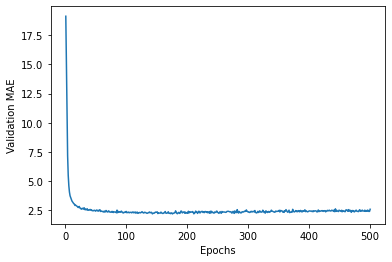

In [30]:
### 검증 점수 그래프 그리기
plt.plot(range(1, len(avg_mae_history) + 1), avg_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

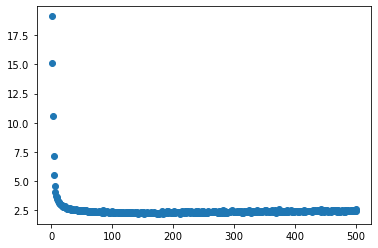

In [31]:
plt.scatter(range(1, 501), avg_mae_history)

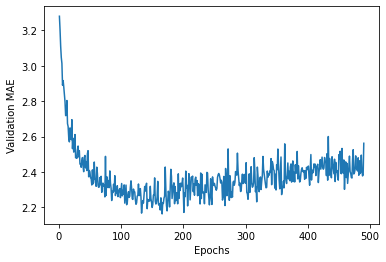

In [32]:
### 처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기
plt.plot(range(1, len(avg_mae_history[10:]) + 1), avg_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

검증 MAE 가 120 ~ 140 번째 에포크 이후에 줄어드는 것이 멈추었다<br>
즉 이 지점 이후로는 '과대적합' 이 시작된 것을 알 수 있다

In [33]:
### 최종 모델 훈련하기

#새롭게 컴파일된 모델
model = build_model()

#전체 훈련 데이터 사용, 최상의 매개변수로 모델 훈련
model.fit(train_x, train_y, epochs=130, verbose=0, batch_size=16)

#테스트 데이터로 성능 확인
test_mse_score, test_mae_score = model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 2ms/step - loss: 17.1574 - mae: 2.6751


In [34]:
print('mae:', test_mae_score)
print('mse:', test_mse_score)

mae: 2.6751041412353516
mse: 17.157432556152344


### ⑤ 새로운 데이터 예측하기
test_x : data , 13개의 변수<br>
test_y : target , 집값<br>

이진 분류 모델에서 predict() 메서드를 호출하면 각 샘플에 대해 0 과 1 사이의 스칼라 점수가 반환되었다<br>
다중 분류 모델의 경우 각 샘플마다 모든 클래스에 대한 '확률 분포' 를 얻을 수 있다

In [35]:
preds = model.predict(test_x)
preds[0]

4/4 [==============================] - 0s 2ms/step


array([8.578828], dtype=float32)

In [36]:
test_y[0]

7.2

# 221124

### * 딥러닝의 작동원리

https://keras.io/<br>

#활성화 함수의 종류 : relu, sigmoid, tanh

#손실함수 (또는 목적함수) : 훈련 과정에서 최소화할 값, 현재 작업에 대한 성공의 척도<br>
#손실함수의 종류 : mae, mse, categorical_crossentropy, sparse_categorical_crossentropy, ...

#옵티마이저 : 손실함수를 기반으로 네트워크가 어떻게 업데이트될지 설정<br>
#옵티마이저의 종류 : SGD / RMSprop / Adam / Adagrad ...

#metrics : 성능평가도구

딥러닝으로 '학습' 한다는 것 --> '알맞은 가중치' 를 찾는 것<br>

편향(bias, b) 이 필요한 이유 --> 딥러닝 분석 결과를 보다 더 정확하게 설명해주기 위해 (가중치 값만으로 설명이 불충분할 때 필요)<br>

'분류' 를 할 때 --> '분포' 확인 --> 손실함수 cross_entropy 사용

오차 역전파 : https://www.datamaker.io/posts/32/<br>

학습률 : https://bioinformaticsandme.tistory.com/130

## 5-1. 일반화 : 머신러닝의 목표

머신러닝에서 중요한 것은 데이터의 '최적화' 와 '일반화' 이다<br>
'최적화' 는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정이다 (= 학습, fit)<br>
'일반화' 는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는가 이다<br>

당연히 목표는 좋은 일반화 성능을 얻는 것이지만, 일반화 성능을 제어할 방법은 없고<br>
단지 모델을 훈련 데이터에 맞출 수만 있다<br>
하지만 이 조차도 만약 모델이 훈련 데이터에 너무 잘 맞는다면 '과대적합' 이 시작되고, 일반화 성능은 나빠진다

### (1) 과소적합과 과대적합
모델 훈련 초기에 최적화와 일반화는 상호 연관되어 있다<br>
즉, 훈련 데이터의 손실이 낮아질수록, 테스트 데이터의 손실도 낮아진다<br>
이러한 상황을 '과소적합' 이라고 하며, 이 때에는 모델의 성능이 계속 발전될 여지가 있다<br>
(네트워크가 훈련 데이터를 아직 다 학습하지 못한 것이다)<br>

하지만 훈련이 특정 횟수만큼 반복되고 난 후에 검증 세트의 성능이 멈추고 감소되기 시작한다<br>
즉 '과대적합' 되기 시작하며, 이는 '훈련 데이터에 특화된' 패턴을 학습하기 시작했다는 것이다<br>

이러한 '과대적합' 은<br>
데이터에 잡음이 있거나 , 불확실성이 존재하거나 , 드문 특성이 포함되어 있을 때<br>
특히 발생할 가능성이 높다

#### * 잡음 섞인 훈련 데이터
실제 데이터 세트에는 '잘못된 입력' 이 있는 경우가 흔하다<br>

예) MNIST 훈련 세트에 있는 이미지 중 전혀 숫자를 알아볼 수 없는 샘플,<br>
정상적인 이미지인데 레이블이 잘못된 경우 등 ...<br>

모델을 이러한 '이상치' 에 맞추려고 하면, 일반화 성능이 감소한다

#### * 불확실한 특성
데이터 자체에 불확실성과 모호성이 있다면 아무리 완벽하고 깔끔하게 레이블이 부여되었다 하더라도, 잡음이 있을 수 있다<br>
분류 작업에서 입력 특성 공간의 일부 영역이 동시에 여러 클래스에 연관된 경우가 종종 있다

예) 날씨 예보 데이터, 바나나 이미지로 바나나의 익은 정도 파악하기 등 ...<br>

특성 공간의 모호한 영역에 너무 확신을 가지면 과대적합 될 수 있다<br>
즉 개별 데이터 포인트는 무시하고 전체적으로 바라보아야 하는 것이다

#### * 드문 특성과 가짜 상관관계
드문 특성 값에 매우 높은 가중치를 부여해서 잘못 분류하는 것이다

In [59]:
from tensorflow.keras.datasets import mnist

In [55]:
(train_images, train_labels), _ = mnist.load_data()
train_images.shape

(60000, 28, 28)

In [56]:
train_images[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [57]:
train_images.dtype

dtype('uint8')

In [58]:
#train_images = train_images.reshape((60000, 28 * 28))
#train_images.astype('float32') / 255
(train_images.astype('float32') / 255).dtype

dtype('float32')

In [60]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

#백색 잡음 데이터 생성
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

#비교를 위한 데이터 생성
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [61]:
## 백색 잡음 데이터를 추가한 MNIST 데이터 훈련하기

model = Sequential([
    Dense(units=512, activation='relu'),
    Dense(units=10, activation='softmax'),
])

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.6095 - accuracy: 0.8138 - val_loss: 0.3057 - val_accuracy: 0.9043
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.2422 - accuracy: 0.9242 - val_loss: 0.1749 - val_accuracy: 0.9488
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1564 - accuracy: 0.9525 - val_loss: 0.1579 - val_accuracy: 0.9541
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1114 - accuracy: 0.9655 - val_loss: 0.1303 - val_accuracy: 0.9626
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0818 - accuracy: 0.9738 - val_loss: 0.1171 - val_accuracy: 0.9679
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0626 - accuracy: 0.9792 - val_loss: 0.1188 - val_accuracy: 0.9682
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.1347 - val_accuracy: 0.9629

In [62]:
## 0을 추가한 MNIST 데이터 훈련하기

model = Sequential([
    Dense(units=512, activation='relu'),
    Dense(units=10, activation='softmax'),
])

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2926 - accuracy: 0.9142 - val_loss: 0.1551 - val_accuracy: 0.9534
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1194 - accuracy: 0.9646 - val_loss: 0.1185 - val_accuracy: 0.9657
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0778 - accuracy: 0.9770 - val_loss: 0.0869 - val_accuracy: 0.9740
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0557 - accuracy: 0.9836 - val_loss: 0.0840 - val_accuracy: 0.9761
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0416 - accuracy: 0.9877 - val_loss: 0.0861 - val_accuracy: 0.9743
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0317 - accuracy: 0.9911 - val_loss: 0.0825 - val_accuracy: 0.9773
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0236 - accuracy: 0.9932 - val_loss: 0.0826 - val_accuracy: 0.9776

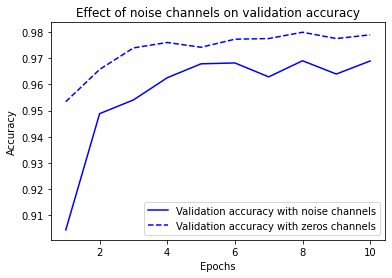

In [63]:
## 검증 정확도 비교 그래프 그리기

plt.plot(range(1, 11), history_noise.history["val_accuracy"], "b-",
        label = "Validation accuracy with noise channels")
plt.plot(range(1, 11), history_zeros.history["val_accuracy"], "b--",
        label = "Validation accuracy with zeros channels")

plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

두 데이터 모두 동일한 정보를 갖고 있지만, 잡음이 섞인 데이터(noise) 에서 훈련된 모델의 검증 정확도가 더 낮다<br>
이는 순전히 가짜 상관관계의 영향 때문이며, 이러한 잡음이 더 많이 있을수록 정확도는 더 감소될 것이다<br>

잡음 특성은 필연적으로 과대적합을 유발시키므로, 특성이 모델이 유익한지 또는 모델을 혼란스럽게 하는지 확실하지 않다면<br>
훈련 전에 '특성 선택' 을 수행하는 것이 일반적이다<br>

특성과 레이블 사이의 '상호 의존 정보' 처럼, 작업에 대해 특성이 얼마나 유익한지 측정하고,<br>
일정 임계값을 넘긴 특성만 사용하는 것이다

### (2) 딥러닝 일반화 : 보간
보간 : 빈자리에 값을 채워 넣다

딥러닝 모델은 근본적으로 매우 고차원의 곡선이다<br>
필수적으로 미분가능해야 하기 때문에 매끄럽고, 연속적인 곡선이다<br>
(이런 매끄러움은 동일한 속성을 가진 잠재 매니폴드를 근사하는데에 도움이 된다)<br>

경사하강법을 통해 이 곡선을 부드럽고 점진적으로 데이터 포인트에 맞춘다<br>
즉 딥러닝은 본질적으로 크고 복잡한 곡선(매니폴드) 을 선택하여 훈련 데이터 포인트에 맞을 때까지<br>
파라미터를 점진적으로 조정하는 것이다

딥러닝 모델을 향상시키는 가장 좋은 방법은 더 좋고, 더 많은 데이터에서 훈련하는 것이다<br>
입력 데이터 매니폴드를 조밀하게 커버하면 일반화 성능이 더 좋은 모델을 만들 수 있으며,<br>
데이터를 많이 수집하는 것이 불가능하다면 모델이 저장할 수 있는 정보량을 조정하거나<br>
모델 곡선의 매끄러운 정도에 제약을 추가하는 방법도 있다

# 221125

#### * 함수 근사화
어떤 함수도 근사화 할 수 있다 (비슷하게 만들 수 있다)<br>
직선의 합으로 '곡선' 을 만들어낸다

## 2-4. 그레디언트 기반 최적화

### (1) output = relu(dot(W, input) + b)
relu : 활성화 함수<br>
W : 가중치 (weight)<br>
b : 편향 (bias)

딥러닝에서 각 층(Dense)은 입력 데이터를 위의 식과 같이 변환한다<br>

초기에는 가중치 행렬이 작은 난수(임의의 수) 로 채워져 있다 (무작위 초기화 단계)<br>
W와 b가 난수일 때의 output 은 의미 없는 값이며, 이후에 피드백 신호에 기초하여 가중치가 점진적으로 조정된다<br>
(머신러닝의 핵심 : "점진적인 조정 또는 훈련" , 훈련 = fit = learn(학습) )

훈련은 '훈련 반복 루프' 안에서 일어나며 (epoch), 손실이 충분히 낮아질 때까지 반복된다<br>

① 훈련 샘플 x와, 이에 상응하는 타깃 y-true 생성<br>
② x (input) 를 사용하여 모델 실행, 예측 y-pred (output) 추출<br>
③ y-pred 와 y-true 의 '차이' 를 측정하여 모델의 '손실' 계산<br>
④ 손실이 감소되도록 가중치(W) 업데이트

가중치를 증가시켜야할지, 감소시켜야할지, 얼만큼 업데이트해야할지 어떻게 알 수 있을까<br>
(가중치 초기화 : https://yngie-c.github.io/deep%20learning/2020/03/17/parameter_init/)

#### 경사하강법
모델에 사용되는 모든 함수는 입력값(x) 을 연속적인 방식으로 변환(y) 한다<br>
(즉 모델에 사용되는 모든 함수는 '연속적' 이다)<br>

예) z = x + y<br>
y 를 조금 변경하면 z 값도 조금 변경된다<br>
즉 y 의 변경 방향을 알고있다면 z 의 변경 방향을 추측할 수 있는 것이다 --> "미분가능"<br>

모델의 가중치를 조금 변경하면 --> 손실 값이 예측 가능한 방향으로 조금 바뀐다<br>
여기에 '그레디언트(gradient)' 를 사용하여 가중치를 여러 방향으로 이동했을 때 손실이 얼마나 변하는지 파악하고,<br>
최종적으로 '손실이 감소하는 방향으로' 가중치를 이동시킬 수 있다

### *** 미분 = 도함수 = 기울기 = 미분계수 = Gradient(그레디언트) ***

### (2) 도함수

함수를 미분할 수 있다는 것은 f(x) 값은 최소화하는 x 값을 찾는 '최적화' 를 할 수 있다는 것이다<br>
f(x) 를 최소화하기 위해 x 값을 업데이트 하고 싶을 때, f의 도함수(=기울기) 를 알고 있으면 해결된다<br>

도함수(=기울기) 는 x 의 변화에 따라 f(x) 가 어떻게 바뀌는지 설명해주며,<br>
f(x) 값을 감소시키고 싶다면, x 를 도함수의 방향과 반대로 조금 이동하면 된다<br>

loss = f(W) 라면,<br>
grad( f(W) , W ) --> W 점에서의 미분값 (기울기) ,<br>
= df(W) / dW

### (3) 그레디언트
= 텐서 연산의 도함수<br>
(x 값 '2개' 로 y 값을 결정한다면)

#### z = x + 2y
-> x 와 y 는 서로 연관성이 없다<br>
-> 함수 z 의 기울기계수 (미분계수) = '2'<br>

z 를 아이스크림 판매량, x 를 가격, y 를 온도라고 하고, x 와 y 가 각각 z 에 영향을 미치는 정도를 알아보려고 한다.

#### ① y 의 영향력은?
y 가 미치는 영향력만 확인하고 싶은 것이므로, x 는 '임의의 고정된 상수값' 이라 생각하고 무시한다 (y 의 변화에만 집중)<br>

#### 변수가 2개일 때의 미분 --> "편미분 (편도함수)"
함수 z 를 y 로 미분한다<br>
dz/dy = dx/dy + d2y/dy<br>

x 는 임의의 고정된 상수값이라 생각하기로 했으므로 (변화량 없음) 무시하면,<br>
dz/dy = d2y/dy , 즉 dz/dy = 2 가 된다<br>

따라서 y 의 변화에 따른 z 의 변화량 (기울기) 는 '2' 이며,<br>

이를 '그레디언트' 로 표현하면<br>
grad(z, y) = 2 이다

#### ② x 의 영향력은?
x 가 미치는 영향력만 확인하고 싶은 것이므로, 이번에는 y 를 '임의의 고정된 상수값' 이라 생각하고 무시한다<br>

함수 z 를 x 로 미분한다<br>
dz/dx = dx/dx + d2y/dx<br>

y 값은 무시<br>
dz/dx = dx/dx = 1

x 의 변화에 따른 z 의 변화량 (기울기) 는 '1' 이다<br>
grad(z, x) = 1

#### 머신 러닝 기반의 예
y_pred = dot(W, x)<br>
loss_value = loss(y_pred, y_true)<br>

x : 입력 벡터 , 데이터셋에 있는 샘플<br>
W : 행렬 , 모델의 가중치<br>
y_true : 타깃 , 정답값<br>
loss : 손실함수, y_pred 와 y_true 간의 차이 측정<br>

즉 위의 식은 아래와 같은 함수로 표현할 수 있다<br>
loss_value = f(W) --> 함수 f 는 W 가 변화할 때의 loss 가 형성하는 곡선이다<br>

'W0 = 현재 W 값' 일 때, W0 점에서의 기울기 (f의 도함수) 는 'grad( loss_value, W0 )' 이다<br>
즉 W0 에서 함수 f(W) = loss_value 의 그레디언트는 'grad( loss_value, W0 )' 이다 (loss 값을 W0 에서 미분한 값 , 기울기)

#### ** 가중치 업데이트
'하나' 의 가중치를 가진 함수 f(x) 의 '도함수' = 곡선 f 의 '기울기'<br>
grad(loss_value, W0) = W0 에서 loss_value = f(x) 가 가장 가파르게 상승하는 방향과, 이 방향의 '기울기'<br>
편도함수 = f 의 특정 방향 '기울기'<br>

따라서 함수 f(x) 의 도함수(=기울기) 의 '반대 방향' 으로 x 를 움직이면 f(x) 의 값을 '감소' 시킬 수 있다<br>
텐서의 함수 f(W) 는 그레디언트(=기울기) 의 '반대 방향' 으로 w 를 움직이면 loss_value 의 값을 '감소' 시킬 수 있다<br>

loss = f(W)<br>
W1 = W0 - step * grad( f(W0) , W0 )<br>
(step : W0 에서 너무 크게 벗어나지 않기 위한 스케일링 비율, '학습률')

### (4) 확률적 경사 하강법

#### '확률적(stochastic)'
데이터가 '랜덤하게' 선택된다는 의미

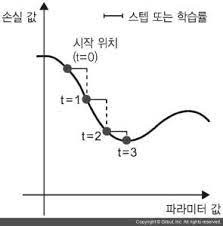

#### '미니 배치 확률적 경사 하강법' 알고리즘
랜덤한 데이터에서 현재 손실 값을 토대로 하여 조금씩 가중치를 수정<br>

① 훈련 샘플 x 와 타깃 y_true 추출<br>
② x 로 모델 실행 , 예측 y_pred 추출 (정방향 패스)<br>
③ y_pred 와 y_true 의 오차를 측정하여 모델의 손실 계산<br>
④ 모델의 가중치에 대한 손실 함수의 그레디언트 (기울기) 계산 (역방향 패스)<br>
⑤ 그레디언트의 '반대 방향' 으로 가중치 업데이트, 손실 감소<br>
--> W1 = W0 - learning_rate * grad( f(W0) , W0 )

#### ** '학습률 (learning rate)'
경사하강법 과정의 '속도를 조절' 하는 스칼라 값<br>
학습률 값이 너무 작으면 손실 함수 곡선을 따라 내려가는데 너무 많은 반복이 필요하고 '지역 최솟값' 에 갇힐 수 있다<br>
반대로 너무 크면 곡선에서 완전히 임의의 위치로 이동시킬 수 있다

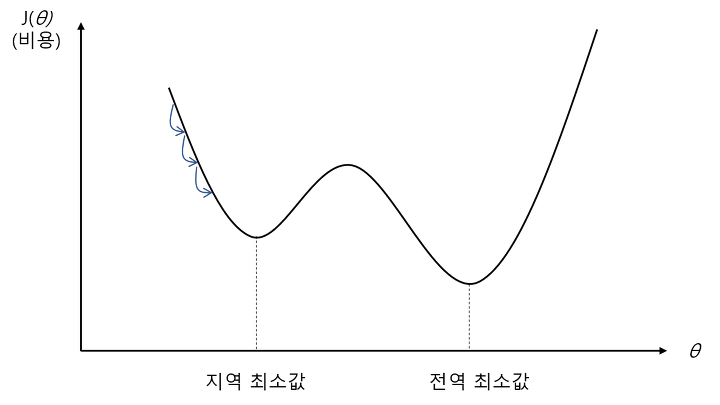

* '배치 경사 하강법'<br>
가용한 모든 데이터를 사용하여 가중치 업데이트 실행<br>
더 정확하게 업데이트 되지만, 더 많은 비용이 든다

#### ** '옵티마이저'
업데이트할 다음 가중치를 계산할 때 '이전에 업데이트된 가중치' 를 여러가지 다른 방식으로 고려하는 것<br>
SGD, Adagrad, RMSProp 등

* 모멘텀 (momentum)<br>

'작은 학습률' 로 경사 하강법이 진행되었다면 최적화 과정이 전역 최소값으로 향하지 못하고<br>
지역 최소값에 갇히게 된다<br>

이러한 경우 '모멘텀' 을 사용하여 이 문제를 피할 수 있다<br>
학습률을 높이는 것이 아니라, 모멘텀을 더해주는 것이다<br>

최적화 과정을 손실 곡선 위로 작은 공을 굴리는 것으로 생각하면,<br>
모멘텀이 충분하면 공이 골짜기(지역 최소값) 에 갇히지 않고 전역 최소값에 도달할 수 있다<br>

모멘텀은 현재 그레디언트(기울기) 값 뿐만 아니라, 이전에 업데이트한 파라미터에 기초하여<br>
가중치 W 를 업데이트 한다<br>

코드 구현 예<br>
velocity = momentum * past_velocity - learning_rate * gradient<br>
w = w + momentum * velocity - learning_rate * gradient<br>
past_velocity = velocity<br>
update_parameter(w)

## 5-2. 일반화 : 머신러닝 모델 평가

### (1) 훈련, 검증, 테스트 세트

모델 평가의 핵심은 데이터를 항상 '훈련, 검증, 테스트' 3개의 세트로 나누는 것이다<br>

훈련 세트에서 모델을 훈련(fit) 하고, 검증 세트에서 모델을 평가 한다<br>
그리고 테스트 세트에서 최종적으로 딱 한 번 모델을 테스트 한다<br>

검증 세트에서는 모델의 성능을 평가하여 모델의 하이퍼 파라미터 튜닝 (층 개수, 유닛 개수 등)을<br>
수행하며, 이러한 과정도 좋은 설정을 찾는 '학습' 이라고 할 수 있다<br>

모델은 간접적으로라도 테스트 세트에 대한 어떤 정보도 얻어서는 안된다<br>
테스트 세트 성능에 기초하여 튜닝한 모델의 모든 설정은 일반화 성능을 왜곡시킬 수 있다<br>

데이터가 적을 때는 몇가지 고급 기법을 사용하여 데이터를 평가한다<br>
대표적인 세 가지 평가방법 - 단순 홀드아웃 검증, k-fold 교차 검증, 셔플링을 사용한 반복 k-fold 교차 검증

#### * 단순 홀드아웃 검증
데이터의 일정량을 테스트 세트로 떼어놓고, 남은 데이터에서 훈련한 뒤 테스트 세트로 평가한다<br>
하지만 이 방법은 데이터가 적을 때는 검증 세트와 테스트 세트의 샘플 수가 너무 적어<br>
주어진 전체 데이터를 통계적으로 대표하지 못할 수 있다

#### * k-fold 교차 검증
데이터를 동일한 크기를 가진 k 개의 분할로 나누고,<br>
k-1 개의 분할로 모델을 훈련하고 남은 하나의 분할에서 모델을 평가한다<br>
최종 점수는 이렇게 얻은 k 개의 점수를 평균한다<br>

이 방법은 모델의 성능이 데이터 분할에 따라 편차가 클 때 도움이 된다

#### * 셔플링을 사용한 반복 k-fold 교차 검증
비교적 가용 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용한다<br>
k-fold 교차 검증을 여러번 적용하되, k 개의 분할로 나누기 전에 매번 데이터를 랜덤하게 섞는다<br>
최종 점수는 모든 k-fold 교차 검증을 실행해서 얻은 점수의 평균값이다<br>

반복적으로 훈련과 평가를 수행하므로 비용이 많이 든다는 단점이 있다

### (2) 상식 수준의 기준점 넘기
딥러닝의 모델 훈련은 수천 개의 차원을 가진 공간에서 일어나기 때문에 볼 수도, 들을 수도 없다<br>

이러한 모델 훈련이 잘 진행되고 있는지 알기 위해서는<br>
데이터셋으로 작업을 시작하기 전에 항상 넘어야 할 간단한 기준점을 정해야 한다<br>
이 기준점(임계값) 을 넘으면 제대로 하고 있음을 알 수 있는 것이다<br>

예) MNIST 숫자 분류에서의 기준점 : 0.1 보다 높은 검증 정확도<br>
    IMDB 데이터셋 : 0.5 보다 높은 검증 정확도<br>
    로이터 데이터셋 : 클래스가 불균형하므로 0.18 ~ 0.19 근처

### (3) 모델 평가에 대해 유의해야할 점
평가 방식을 선택할 때 유의해야할 점

#### * 대표성 있는 데이터
훈련 세트와 테스트 세트가 주어진 전체 데이터에 대한 '대표성' 이 있어야 한다<br>
(어느 한 쪽의 데이터만 갖고 있어서는 안된다. 양이 적더라도 대표적인 값들을 포함하고 있어야 한다)<br>

때문에 훈련 세트와 테스트 세트로 나누기 전 데이터를 무작위로 섞는 것이 일반적이다

#### * 시간의 방향
예측하려는 데이터가 '시간' 의 조건을 갖고 있다면 (내일의 날씨, 주식 시세 등, 과거로부터 미래 예측)<br>
데이터를 분할하기 전에 무작위로 섞어서는 절대 안된다. 미래의 정보가 누설될 수 있기 때문이다<br>

이런 문제에서는 테스트 세트에 있는 모든 데이터가 미래의 것이어야 한다

#### * 데이터 중복
하나의 데이터셋에 어떤 데이터 포인트가 두 번 있다면,<br>
데이터를 섞고 훈련 & 검증 세트로 나누었을 때 훈련 세트와 검증 세트에 데이터 포인트가 중복될 수 있다<br>

이로 인해 훈련 데이터의 일부로 테스트를 하게 되는 최악의 경우가 된다<br>
훈련 세트와 테스트 세트에 중복되는 부분이 없는지 반드시 확인해야한다

## 5-3. 훈련 성능 향상하기
최적 적합 모델을 얻으려면 먼저 '과대적합' 되어야 한다<br>
최적 적합의 경계를 미리 알 수 없기 때문에, 이 경계를 찾으려면 넘어가 보아야 한다<br>

따라서 문제를 다루기 시작할 때 초기 목표는 약간의 일반화 능력을 보이고 과대적합할 수 있는 모델을 얻는 것이다<br>
이런 모델을 얻고 난 후, 일반화 성능을 개선 (과대적합 완화?) 하는 데에 초점을 맞춘다

### (1) 경사 하강법의 핵심 파라미터 튜닝하기
경사 하강법의 파라미터 -<br>
옵티마이저 선택 , 모델 가중치의 초기값 분포 , 학습률 , 배치 크기(batch_size) 는<br>
상호 의존적이다<br>

일반적으로는 '학습률' 과 '배치 크기' 를 튜닝하는 것으로 충분하다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import keras
from keras import Sequential
from keras import layers
from keras import optimizers
from keras.layers import Input, Dense

In [5]:
from keras.datasets import mnist

In [6]:
### 잘못된 높은 학습률로 MNIST 모델 훈련하기

(train_images, train_labels), _ = mnist.load_data()    #'_' : test 데이터는 받지 않음
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1.),   #'1.' : 학습률 1.0
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 1088.9346 - accuracy: 0.3584 - val_loss: 2.5157 - val_accuracy: 0.2536
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 3.6416 - accuracy: 0.2309 - val_loss: 3.0854 - val_accuracy: 0.2656
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 2.9747 - accuracy: 0.2522 - val_loss: 2.4007 - val_accuracy: 0.2440
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 4.5557 - accuracy: 0.2244 - val_loss: 2.7634 - val_accuracy: 0.2451
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 3.0173 - accuracy: 0.2320 - val_loss: 2.1435 - val_accuracy: 0.2255
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 2.5780 - accuracy: 0.2247 - val_loss: 3.6810 - val_accuracy: 0.2513
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.3912 - accuracy: 0.2318 - val_loss: 50.3441 - val_accuracy: 0.2173
Ep

In [7]:
### 같은 모델을 적절한 학습률로 훈련하기
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),   #학습률이 1e-2 (=0.01)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3650 - accuracy: 0.9119 - val_loss: 0.1533 - val_accuracy: 0.9614
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1412 - accuracy: 0.9638 - val_loss: 0.1996 - val_accuracy: 0.9557
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1130 - accuracy: 0.9735 - val_loss: 0.1441 - val_accuracy: 0.9724
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0946 - accuracy: 0.9783 - val_loss: 0.1983 - val_accuracy: 0.9649
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0841 - accuracy: 0.9823 - val_loss: 0.2019 - val_accuracy: 0.9715
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0787 - accuracy: 0.9847 - val_loss: 0.2236 - val_accuracy: 0.9731
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0739 - accuracy: 0.9850 - val_loss: 0.2567 - val_accuracy: 0.9705
Epoch 

In [8]:
### 배치 크기를 조정하여 재훈련하기
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(0.01),   #학습률이 1e-2 (=0.01)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=32,    #batch_size 변경
          validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3501 - accuracy: 0.9207 - val_loss: 0.2397 - val_accuracy: 0.9532
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2595 - accuracy: 0.9585 - val_loss: 0.2796 - val_accuracy: 0.9582
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2154 - accuracy: 0.9686 - val_loss: 0.2791 - val_accuracy: 0.9659
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2072 - accuracy: 0.9742 - val_loss: 0.2771 - val_accuracy: 0.9719
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1954 - accuracy: 0.9780 - val_loss: 0.4732 - val_accuracy: 0.9634
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1868 - accuracy: 0.9805 - val_loss: 0.7307 - val_accuracy: 0.9567
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1777 - accuracy: 0.9830 - val_loss: 0.4603 - val_accuracy

* 학습률을 낮추거나, 높인다<br>
너무 높은 학습률은 최적적합을 크게 뛰어넘는 업데이트가 일어날 수 있으며,<br>
너무 낮은 학습률은 훈련을 매우 느리게 만들어 멈춰있는 것 처럼 보일 수 있다

* batch_size 를 증가 시킨다<br>
배치 샘플을 더 늘리면 유익하고 잡음이 적은 (분산이 낮은) 그레디언트가 만들어진다

### (2) 구조에 대해 더 나은 가정하기
모델이 훈련은 되지만, 일반화가 되지 않는다

모델이 훈련은 되지만, 일반화가 되지 않는 이유는?<br>

① 입력 데이터에 타깃 예측을 위한 정보가 충분하지 않기 때문<br>
모델 훈련은 잘 되지만, 검증 정확도는 10% 정도라면 --> 이러한 데이터셋으로는 당연히 일반화가 불가능하다<br>

② 현재 사용하는 모델의 종류가 문제에 적합하지 않기 때문<br>
일반화를 달성하려면 문제에 대한 올바른 가정을 하는 모델을 사용해야 한다<br>
(구조에 대한 올바른 가정을 내려야 한다)

### (3) 모델 용량 늘리기 (모델 과대적합 하기)

In [9]:
### MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델

model = keras.Sequential([layers.Dense(units=10, activation='softmax')])    #층이 1개

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

history = model.fit(train_images, train_labels,
                   epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6784 - accuracy: 0.8309 - val_loss: 0.3632 - val_accuracy: 0.9013
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.9030 - val_loss: 0.3092 - val_accuracy: 0.9139
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.9113 - val_loss: 0.2932 - val_accuracy: 0.9179
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.9164 - val_loss: 0.2831 - val_accuracy: 0.9204
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2895 - accuracy: 0.9189 - val_loss: 0.2779 - val_accuracy: 0.9227
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2829 - accuracy: 0.9210 - val_loss: 0.2733 - val_accuracy: 0.9250
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9221 - val_loss: 0.2694 - val_accuracy: 0.9262
Epoch 

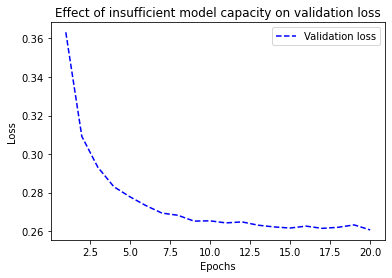

In [11]:
### 손실 곡선
plt.plot(range(1, 21), history.history['val_loss'], 'b--', label='Validation loss')

plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

검증 손실이 0.26 에 도달한 후 그 지점에서 정체되어 있다<br>
(모델을 훈련했지만 훈련 데이터에서 여러번 반복한 후에도 과대적합 되지 못했다)<br>

과대적합은 항상 가능하다 (손실 = 0)<br>
과대적합이 불가능해보인다면, 모델의 표현 능력이 부족한 것이다<br>
즉 용량이 더 큰, 더 많은 정보를 저장할 수 있는 모델이 필요하다<br>

층 개수를 늘리거나, 유닛 수를 늘리거나 (더 많은 가중치를 가지도록),<br>
현재 문제에 더 적합한 종류의 층 (구조에 대해 더 나은 가정) 을 사용할 수 있다

In [12]:
### 모델 수정 - 층 2개 더 추가, unit 수 증가

model = keras.Sequential([
    layers.Dense(units=96, activation='relu'),
    layers.Dense(units=96, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

history = model.fit(train_images, train_labels,
                   epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3605 - accuracy: 0.8990 - val_loss: 0.1961 - val_accuracy: 0.9414
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1590 - accuracy: 0.9532 - val_loss: 0.1364 - val_accuracy: 0.9596
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.9674 - val_loss: 0.1136 - val_accuracy: 0.9663
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9745 - val_loss: 0.1150 - val_accuracy: 0.9650
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9796 - val_loss: 0.0925 - val_accuracy: 0.9735
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.0979 - val_accuracy: 0.9728
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0966 - val_accuracy: 0.9718
Epoch 

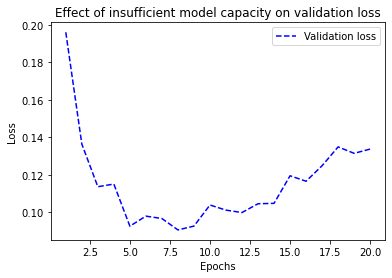

In [13]:
### 손실 곡선
plt.plot(range(1, 21), history.history['val_loss'], 'b--', label='Validation loss')

plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

epoch = 8 이후에 과대적합이 시작되는 것을 볼 수 있다

## 5-4. 일반화 성능 향상하기
모델이 어느정도 일반화 성능을 갖고, 과대적합할 수 있다면 이제 일반화를 극대화하는 데에 초점을 맞춘다

### (1) 데이터셋 점검
딥러닝은 일종의 곡선을 맞추는 작업이다<br>
(함수 근사화 - 여러개의 직선을 합해서 곡선을 만든다)<br>

따라서 적절한 데이터셋으로 작업하고 있는지 확인하는 것이 중요하다

① 데이터가 충분한지 확인한다<br>
데이터가 많을수록 좋은 모델이 만들어진다<br>
처음에는 불가능한 것처럼 보이는 문제가 '대용량의 데이터셋' 으로 해결되기도 한다<br>

② 레이블 할당 에러를 최소화 한다<br>
입력을 시각화하여 '이상치' 를 확인하고, 레이블을 교정한다<br>

③ 데이터를 정제하고 누락된 값을 처리한다<br>

④ 많은 특성 중에서 어떤 것이 유용한지 확실하지 않다면 '특성 선택' 을 수행한다

### (2) 특성 공학 (feature engineering)
데이터의 일반화 가능성을 향상시키는 매우 중요한 방법이다<br>

모델에 데이터를 주입하기 전에 (학습이 아닌) 하드코딩된 변환을 적용하여 알고리즘이 더 잘 수행되도록 만들어준다<br>

머신 러닝 모델이 임의의 데이터에 대해 완벽한 학습을 한다고 기대하기는 어렵다<br>
즉 모델이 수월하게 작업할 수 있는 방식으로 데이터가 표현될 필요가 있다

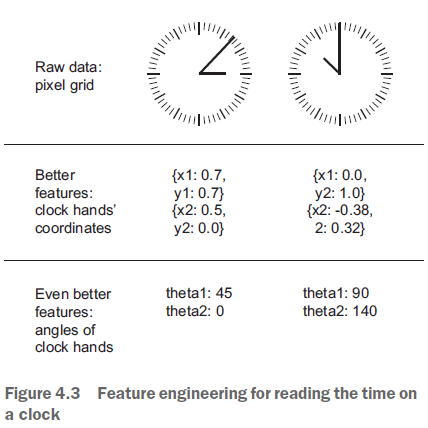

특성 공학은 이처럼 특성을 더욱 간단한 방식으로 표현하여 문제를 쉽게 만드는 것이다<br>

좋은 특성은 '적은 자원' 을 사용하여 문제를 풀어낼 수 있으며,<br>
'더 적은 데이터' 로 문제를 풀 수 있다

### (3) 조기 종료
최상의 검증 점수를 내는 에포크 횟수를 찾기 위해 'EarlyStopping 콜백' 을 사용한다<br>
에포크가 1번 끝날 때마다 모델을 저장하고, 최상의 에포크를 찾은 후 저장된 모델을 재사용할 수 있다<br>
검증 지표가 더이상 향상되지 않으면 바로 훈련을 중지하고, 그 전까지 최상의 검증 점수를 낸 모델을 남길 수 있다

### (4) 모델 규제
'규제 (regularization)' 기법은 훈련 데이터에 완벽하게 맞추려는 모델의 능력을 적극적으로 '방해' 하는 것이다<br>
이를 통해 모델을 더 간단하고 평범하게, 곡선을 부드럽고 더 일반적으로 만듬으로써 모델의 검증 점수를 향상시킨다<br>

따라서 모델이 훈련 세트에 덜 특화되고, 데이터의 잠재 매니폴드를 조금 더 가깝게 근사함으로써 일반화 능력을 높일 수 있다

너무 작은 모델은 과대적합 되지 않는다<br>
과대적합을 완화시키는 가장 간단한 방법은 모델의 크기<br>
(층의 수 와 유닛의 수 로 결정되는 학습 가능한 파라미터 개수) 를 줄이는 것이다<br>

모델의 기억 용량에 제한이 있다면 훈련 데이터를 단순히 외워 버리지 못할 것이다<br>
하지만 동시에 과소적합되지 않도록 충분한 파라미터를 가진 모델을 사용해야 한다<br>
기억 용량이 부족해서는 안된다

In [14]:
### 원본 모델
from tensorflow.keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    #크기가 (len(squences), dimension) 이고, 모든 원소가 0인 행렬 생성
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        #results[i]에서 sequence에 있는 값만 1로 만듬
        results[i, sequence] = 1.
    
    return results

train_data = vectorize_sequences(train_data)

In [15]:
model = keras.Sequential([
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 32ms/step - loss: 0.4965 - accuracy: 0.7906 - val_loss: 0.3718 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2917 - accuracy: 0.9060 - val_loss: 0.3147 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2149 - accuracy: 0.9298 - val_loss: 0.2825 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1703 - accuracy: 0.9441 - val_loss: 0.2734 - val_accuracy: 0.8935
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1417 - accuracy: 0.9538 - val_loss: 0.2801 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1113 - accuracy: 0.9654 - val_loss: 0.2998 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0931 - accuracy: 0.9717 - val_loss: 0.3198 - val_accuracy: 0.8813
Epoch 8/20
30

In [16]:
### 작은 용량의 모델
model = keras.Sequential([
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history_smaller = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.6654 - accuracy: 0.5955 - val_loss: 0.6325 - val_accuracy: 0.6823
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6008 - accuracy: 0.7180 - val_loss: 0.5822 - val_accuracy: 0.7413
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5479 - accuracy: 0.7844 - val_loss: 0.5464 - val_accuracy: 0.8405
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5053 - accuracy: 0.8371 - val_loss: 0.5133 - val_accuracy: 0.8206
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4701 - accuracy: 0.8671 - val_loss: 0.4909 - val_accuracy: 0.8399
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4410 - accuracy: 0.8905 - val_loss: 0.4763 - val_accuracy: 0.8471
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.4163 - accuracy: 0.9095 - val_loss: 0.4668 - val_accuracy: 0.8532
Epoch 8/20
30

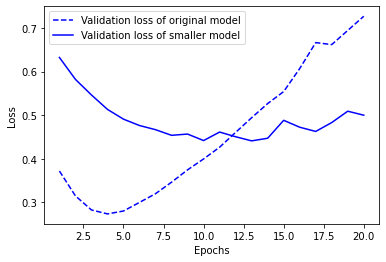

In [17]:
### 검증 손실 비교

plt.plot(range(1, 21), history_original.history['val_loss'], 'b--', label='Validation loss of original model')
plt.plot(range(1, 21), history_smaller.history['val_loss'], 'b-', label='Validation loss of smaller model')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

작은 모델이 기본 모델보다 더 나중에 과대적합 되기 시작했다

In [19]:
### 큰 용량의 모델
model = keras.Sequential([
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history_larger = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 133ms/step - loss: 0.5374 - accuracy: 0.7539 - val_loss: 0.3466 - val_accuracy: 0.8570
Epoch 2/20
30/30 [==============================] - 4s 119ms/step - loss: 0.2583 - accuracy: 0.8999 - val_loss: 0.3478 - val_accuracy: 0.8536
Epoch 3/20
30/30 [==============================] - 3s 113ms/step - loss: 0.1492 - accuracy: 0.9459 - val_loss: 0.2855 - val_accuracy: 0.8951
Epoch 4/20
30/30 [==============================] - 3s 112ms/step - loss: 0.0851 - accuracy: 0.9718 - val_loss: 0.3952 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 3s 113ms/step - loss: 0.1261 - accuracy: 0.9789 - val_loss: 0.3503 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 3s 111ms/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 0.4932 - val_accuracy: 0.8896
Epoch 7/20
30/30 [==============================] - 3s 113ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.6191 - val_accuracy: 0.8879
Epoch 

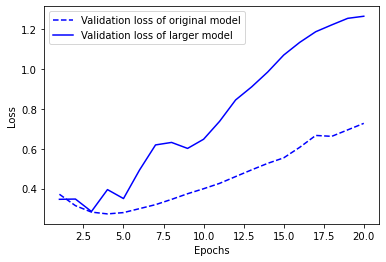

In [20]:
### 검증 손실 비교

plt.plot(range(1, 21), history_original.history['val_loss'], 'b--', label='Validation loss of original model')
plt.plot(range(1, 21), history_larger.history['val_loss'], 'b-', label='Validation loss of larger model')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

용량이 큰 모델은 첫번째 에포크 이후 거의 바로 과대적합이 시작되며, 갈수록 더 심해진다<br>
검증 손실이 매우 불안정하며, 훈련 손실은 매우 빠르게 0 에 가까워진다<br>

용량이 많은 모델일수록 더 빠르게 훈련 데이터를 모델링할 수 있지만, 더욱 과대적합에 민감하며,<br>
결국 훈련과 검증 손실 사이에 큰 차이가 발생하게 된다

#### * 가중치 규제 추가
간단한 모델이 복잡한 모델보다 덜 과대적합 될 가능성이 높다<br>
따라서 과대적합을 완화하기 위한 일반적인 방법은 '모델의 복잡도' 에 제한을 두어<br>
가중치가 작은 값을 가지도록 강제하는 것이며, 이로 인해 가중치 값의 분포가 균일하게 된다

* L1 규제 : 가중치의 '절대값' 에 비례하는 비용이 추가된다 (가중치의 L1 노름 (norm))<br>
* L2 규제 : 가중치의 '제곱'   에 비례하는 비용이 추가된다 (가중치의 L2 노름 (norm))<br>
(L2 규제는 '가중치 감쇠' 라고도 부른다)<br>

https://modern-manual.tistory.com/22

In [21]:
### 모델에 L2 가중치 추가하기
from tensorflow.keras import regularizers

#l2(0.002) : 가중치 행렬의 모든 원소를 제곱하고 0.002 를 곱해 모델의 전체 손실이 더해진다
model = keras.Sequential([
    layers.Dense(units=16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(units=16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history_l2 = model.fit(train_data, train_labels,
                       epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5807 - accuracy: 0.7871 - val_loss: 0.4638 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3946 - accuracy: 0.8943 - val_loss: 0.3935 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3304 - accuracy: 0.9165 - val_loss: 0.3824 - val_accuracy: 0.8791
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3033 - accuracy: 0.9249 - val_loss: 0.3630 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2839 - accuracy: 0.9288 - val_loss: 0.3602 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2694 - accuracy: 0.9339 - val_loss: 0.3647 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2631 - accuracy: 0.9357 - val_loss: 0.3752 - val_accuracy: 0.8808
Epoch 8/20
30

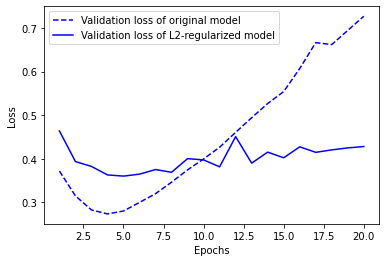

In [22]:
### 검증 손실 비교

plt.plot(range(1, 21), history_original.history['val_loss'], 'b--', label='Validation loss of original model')
plt.plot(range(1, 21), history_l2.history['val_loss'], 'b-', label='Validation loss of L2-regularized model')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

L2 규제를 사용한 모델이 기본 모델보다 훨씬 더 과대적합에 잘 견디고 있음을 알 수 있다

In [23]:
### 케라스에서 사용할 수 있는 가중치 규제

regularizers.l1(0.001)    #L1 규제
regularizers.l1_l2(l1=0.001, l2=0.001)    #L1 규제와 L2 규제 병행 (=엘라스틱)

가중치 규제는 일반적으로 용량이 작은 딥러닝 모델에서 사용된다<br>
대규모 딥러닝 모델은 파라미터가 너무 많기 때문에<br>
가중치 값을 제약하는 것이 모델 용량과 일반화에 큰 영향을 미치지 않는 경향이 있다

#### * 드롭아웃 추가
모델 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 출력 특성을 일부 제외시킨다 (0으로 만든다)<br>
각 샘플에 대해 뉴런의 일부를 무작위하게 제거하면 뉴런의 부정한 협업을 방지하고,<br>
결국 과대적합을 감소시킬 수 있게 된다<br>

층의 출력값에 노이즈를 추가하여 중요하지 않은 우연한 패턴 (부정한 협업) 을 깨뜨리는 것이다

In [24]:
### IMDB 모델에 드롭아웃 추가하기

model = keras.Sequential([
    layers.Dense(units=16, activation='relu'),
    layers.Dropout(0.5),    #unit 이 '8' 이 된다
    layers.Dense(units=16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history_dropout = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.6466 - accuracy: 0.6138 - val_loss: 0.5683 - val_accuracy: 0.8428
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5480 - accuracy: 0.7291 - val_loss: 0.4516 - val_accuracy: 0.8512
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4662 - accuracy: 0.7942 - val_loss: 0.3634 - val_accuracy: 0.8738
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4002 - accuracy: 0.8319 - val_loss: 0.3260 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3480 - accuracy: 0.8635 - val_loss: 0.3035 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3090 - accuracy: 0.8850 - val_loss: 0.2793 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2681 - accuracy: 0.9039 - val_loss: 0.2779 - val_accuracy: 0.8917
Epoch 8/20
30

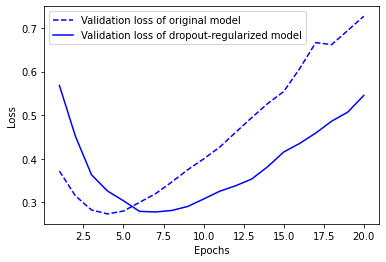

In [25]:
### 검증 손실 비교

plt.plot(range(1, 21), history_original.history['val_loss'], 'b--', label='Validation loss of original model')
plt.plot(range(1, 21), history_dropout.history['val_loss'], 'b-', label='Validation loss of dropout-regularized model')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

#### * 정리
딥러닝에서 일반화 성능을 극대화하고, 과대적합을 방지하기 위해 가장 널리 사용하는 방법은<br>

① 훈련 데이터를 더 모은다 또는 더 나은 데이터를 모은다<br>
② 더 나은 특성을 개발한다 (특성 공학)<br>
③ 네트워크의 용량을 감소시킨다 (조기 종료)<br>
④ (작은 모델을 만들기 위해) 가중치 규제를 추가한다<br>
⑤ 드롭 아웃을 추가한다